# THỰC HÀNH: CÁC GIẢI THUẬT PHÂN LOẠI CƠ BẢN

## A. MỤC TIÊU CHƯƠNG

Mục tiêu của phần thực hành các giải thuật phân loại dữ liệu (Data Classification Algorithms)
được thiết kế để giúp sinh viên phát triển kỹ năng áp dụng các giải thuật phân loại vào việc
giải quyết các bài toán thực tế trong khoa học dữ liệu. Cụ thể, phần thực hành nhằm đạt được
các mục tiêu sau: Hiểu và triển khai các thuật toán phân loại: Cây quyết định và rừng cây
(Decision Tree & Random Forest), Support Vector Machine (SVM) và Bayes ngây thơ (Naive
Bayes) thông qua ngôn ngữ lập trình như Python và sử dụng các thư viện Scikit-learn, SciPy,...

Hướng dẫn thực hiện việc triển khai xây dựng một mô hình học máy cổ điển với các bước:
- Tiền xử lý dữ liệu: Hướng dẫn cách chuẩn bị dữ liệu, bao gồm xử lý giá trị thiếu, chuẩn hóa
dữ liệu, và mã hóa các biến phân loại để phù hợp với yêu cầu của các thuật toán phân loại.
- Đánh giá và tối ưu hóa mô hình: sinh viên sẽ thực hành đánh giá hiệu suất mô hình thông qua các chỉ số như accuracy, precision, recall, F1-score và sử dụng các kỹ thuật như cross-
validation, grid search để tối ưu hóa tham số.

- Phân tích và diễn giải kết quả: Phát triển khả năng diễn giải kết quả phân loại, nhận diện các
vấn đề như quá khớp (overfitting) và đề xuất cải tiến.

## B. KẾT CẤU THỰC HÀNH

Thực hành bao gồm 3 phần là
- Giải thuật cây quyết định và rừng cây
- Giải thuật Support Vector Machine (SVM)
- Giải thuật Bayes ngây thơ

## C. NỘI DUNG THỰC HÀNH

### 2.1. GIẢI THUẬT 1: CÂY QUYẾT ĐỊNH VÀ RỪNG CÂY

### 2.1.2. Bài làm mẫu

#### Bài toán 1: Xây dựng cây quyết định và rừng cây với dữ liệu lấy từ
https://www.kaggle.com/datasets/deceneu/default-of-credit-card-clients

***

##### Nhiệm vụ 1: Xây dựng cây quyết định bằng thư viện Scikit-Learn

**1. Tải một số package mà chúng tôi sử dụng và package graphviz, để vẽ cây quyết định**

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures
import graphviz #to visualize decision trees

**2. Nạp dữ liệu vào bộ nhớ, phân tích và loại bỏ những features không liên quan đến bài toán cần giải
quyết**

In [2]:
df = pd.read_csv('dataset/default_of_credit_card_clients.csv') #Load the cleaned data
features_response = df.columns.tolist() #Get a list of column names
#Make a list of columns to remove that aren't features or the response variable
items_to_remove = ['ID', 'SEX', 'PAY_2', 'PAY_3',\
'PAY_4', 'PAY_5', 'PAY_6',\
'EDUCATION_CAT', 'graduate school',\
'high school', 'none',\
'others', 'university']
features_response = [item for item in features_response if item not
in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

**3. Chuẩn bị dữ liệu cho tập train và tập test**

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import tree

# Split the data into training and testing sets using the same random seed
X_train, X_test, y_train, y_test = train_test_split(
    df[features_response[:-1]].values,  # Features (all columns except the last one)
    df['default payment next month'].values,  # Target variable
    test_size=0.2, 
    random_state=24,
    stratify=df['default payment next month'].values  # Optional: for stratified sampling
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")
print(f"Training set - Class distribution: {np.bincount(y_train)}")
print(f"Test set - Class distribution: {np.bincount(y_test)}")

Training set size: 24000 samples
Test set size: 6000 samples
Number of features: 17
Training set - Class distribution: [18691  5309]
Test set - Class distribution: [4673 1327]


**4. Xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn**

In [4]:
# the tree will grow to a depth of at most 2
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

**5. Hiển thị cây quyết định với package graphviz (thay thế bằng matplotlib)**

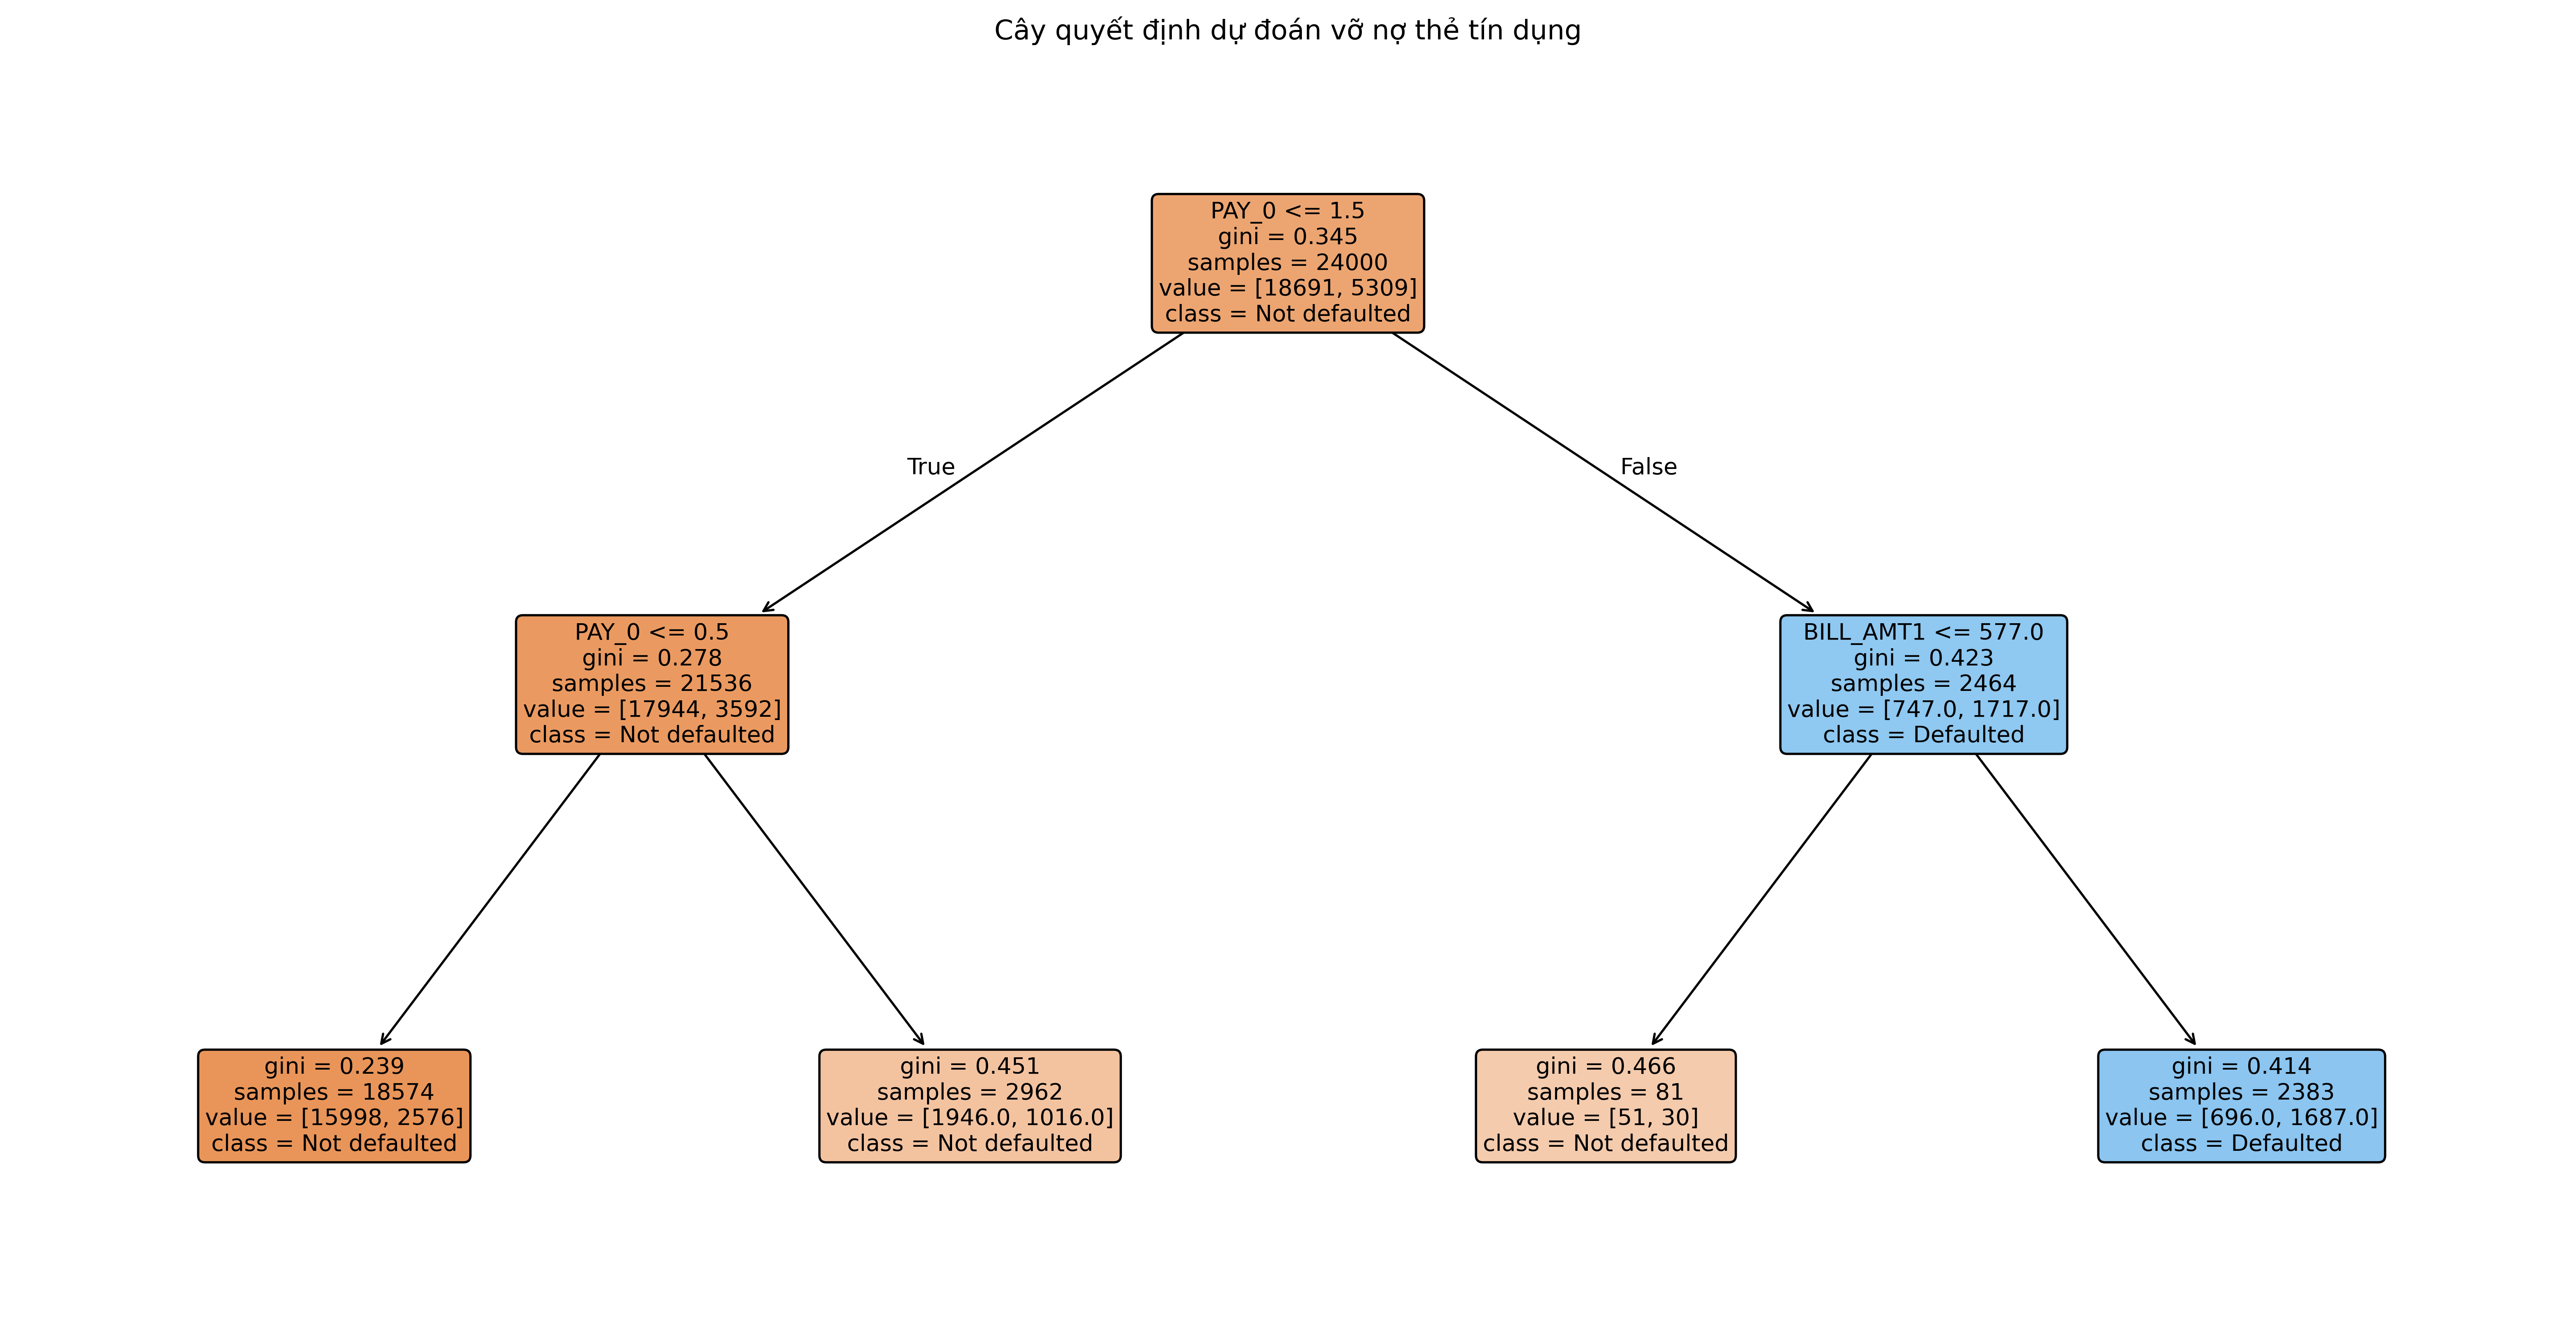

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt, 
          filled=True,
          rounded=True,
          feature_names=features_response[:-1],
          class_names=['Not defaulted', 'Defaulted'],
          fontsize=10,
          max_depth=3)  # Hiển thị 3 tầng đầu cho dễ nhìn
plt.title('Cây quyết định dự đoán vỡ nợ thẻ tín dụng')
plt.show()

##### Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau

**1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu**

**2. Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu**

In [8]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[1, 2, 4, 6, 8, 10, 12]} #parameters
#Thử 7 giá trị độ sâu khác nhau từ cây rất nông (depth=1) đến khá sâu (depth=12)

dt = tree.DecisionTreeClassifier() #tree modal
cv = GridSearchCV(dt, param_grid=params, scoring='roc_auc',
n_jobs=None, refit=True, cv=4, verbose=1,
error_score=np.nan,
return_train_score=True) # cv is the best model.
#scoring='roc_auc' → Ưu tiên phân loại tốt (AUC quan trọng hơn accuracy)

#cv=4 → 4-fold cross-validation (chia data thành 4 phần, train 3 test 1)

#refit=True → Tự động train lại model tốt nhất trên toàn bộ data

#verbose=1 → Hiển thị tiến trình

return_train_score=True → Ghi lại điểm train để so sánh overfitting
cv.fit(X_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [19]:
# Sau khi chạy xong, xem kết quả:
print("Độ sâu tốt nhất:", cv.best_params_)
print("Điểm AUC tốt nhất:", cv.best_score_)

# Model tốt nhất đã được train tự động
best_dt = cv.best_estimator_

Độ sâu tốt nhất: {'max_depth': 6}
Điểm AUC tốt nhất: 0.7464000301203957


**3. Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau**

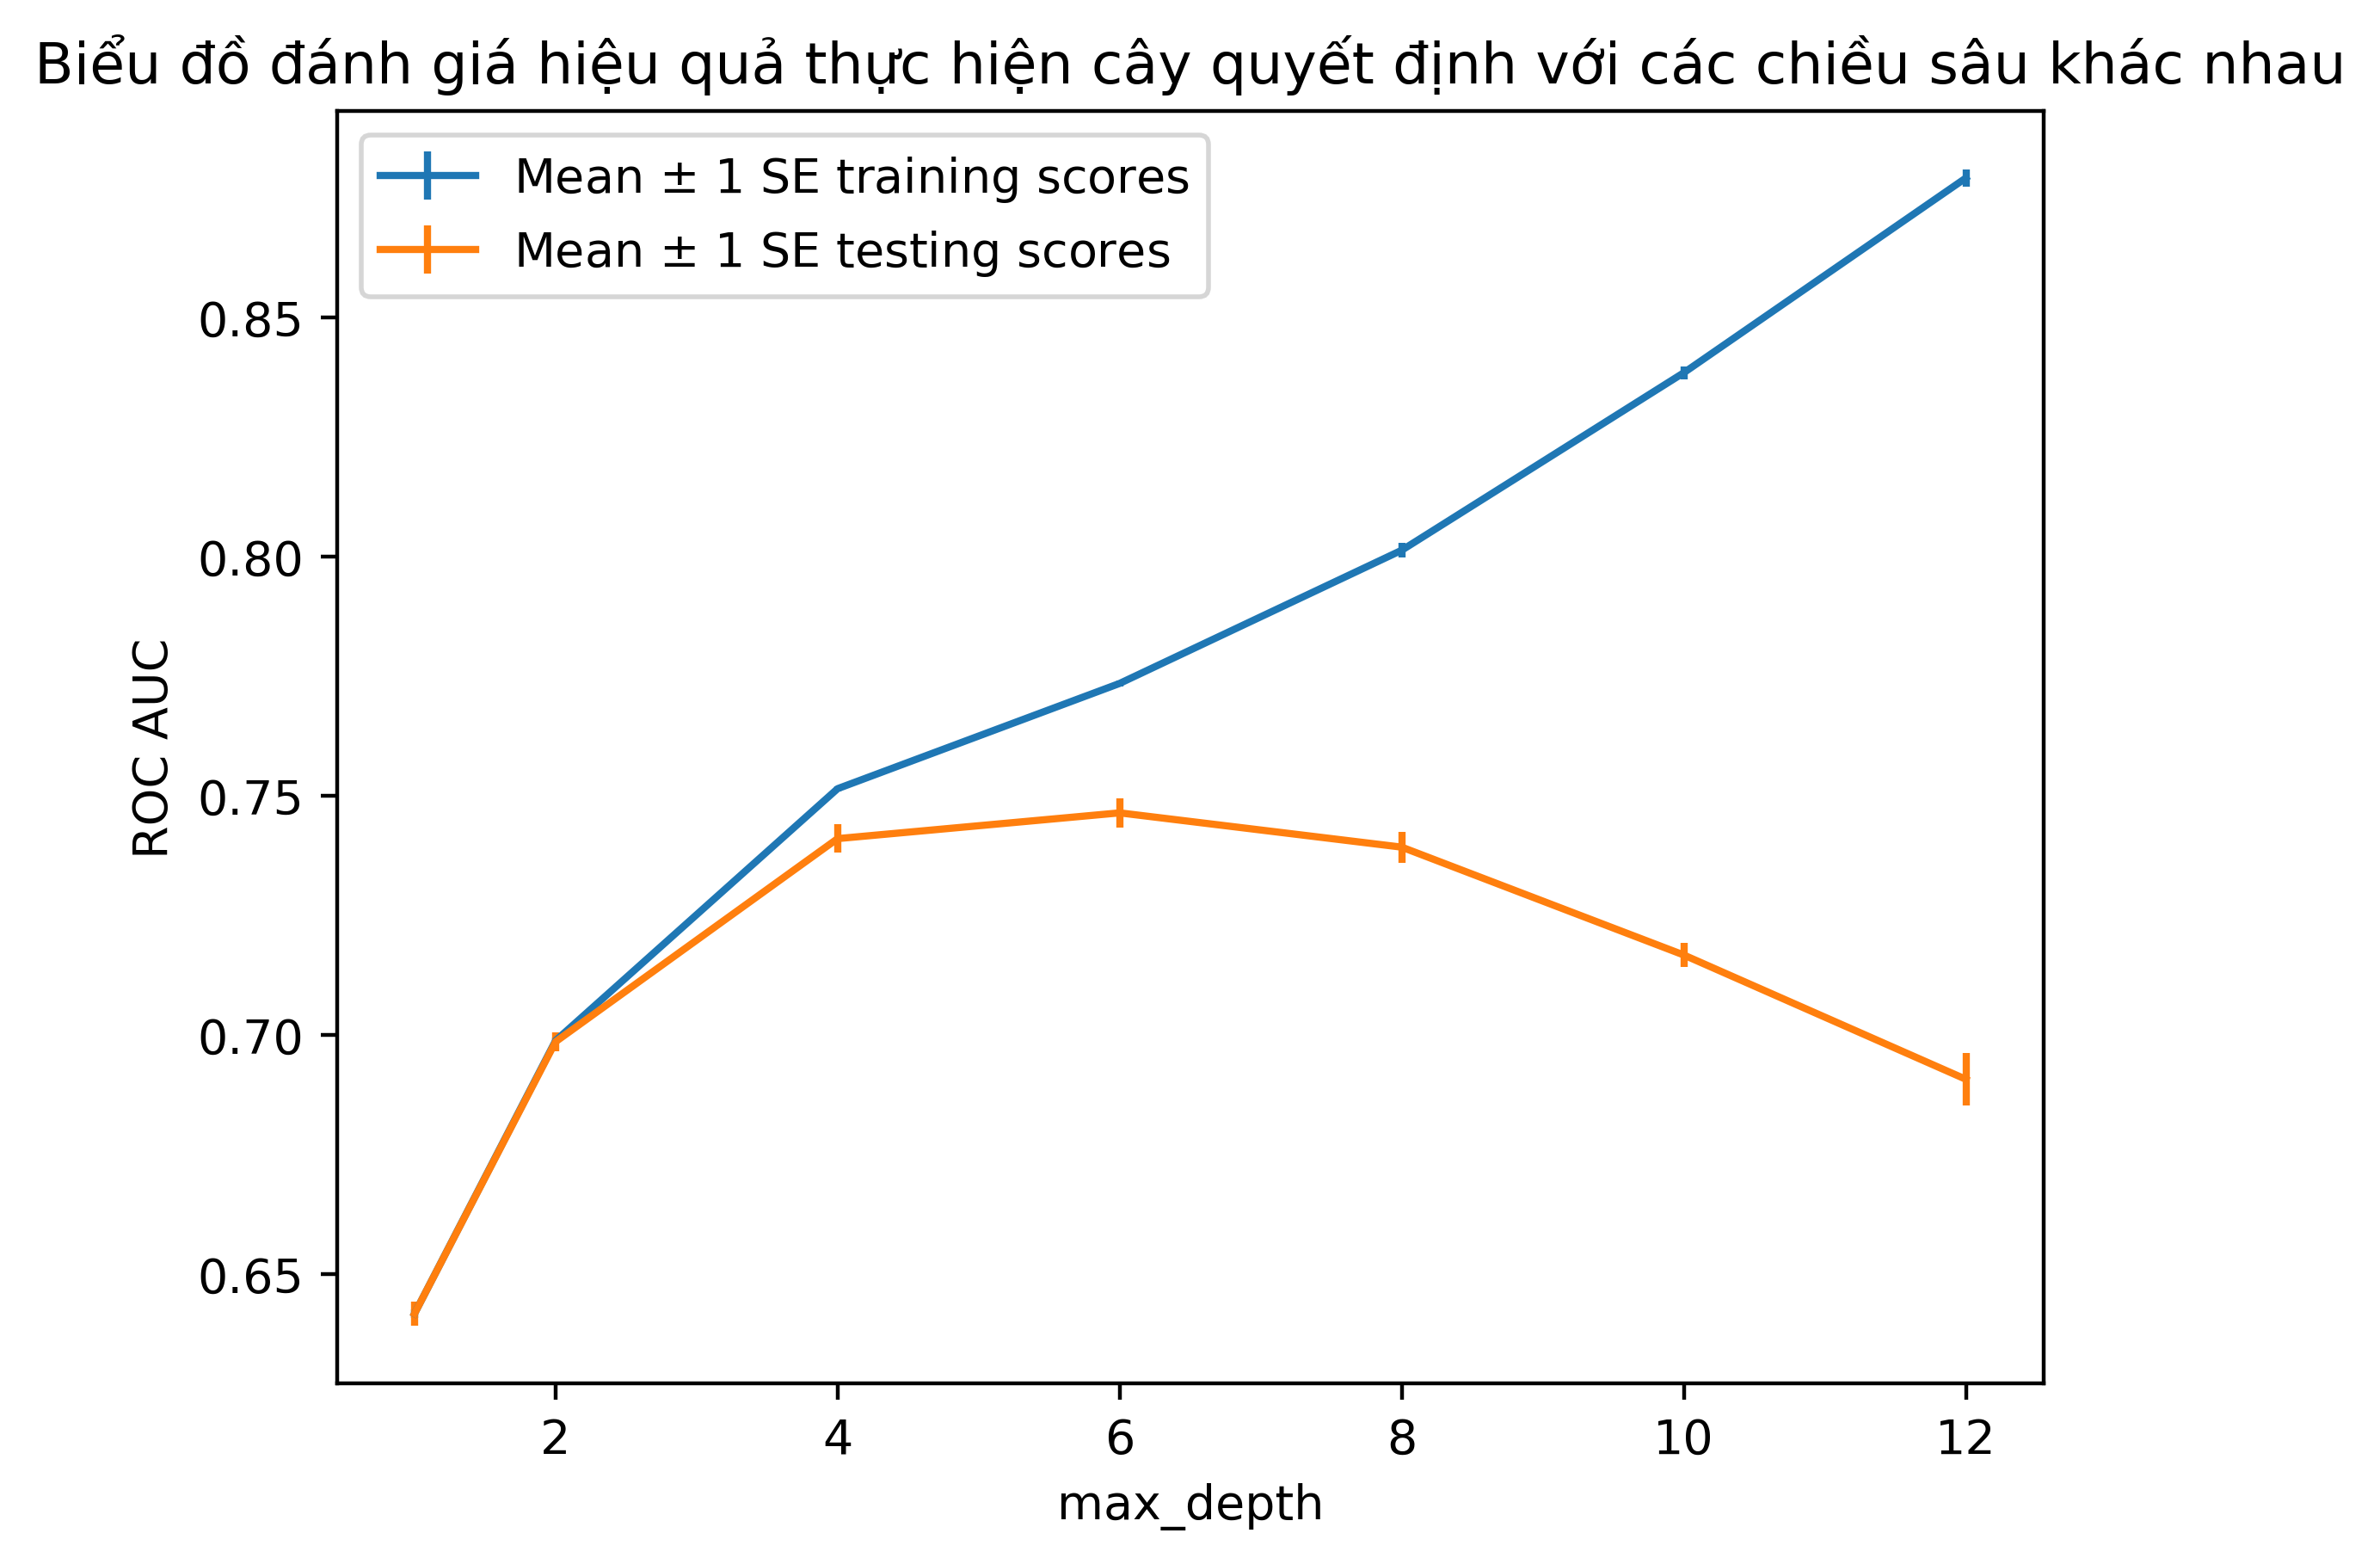

In [13]:
cv_results_df = pd.DataFrame(cv.cv_results_)

# View the names of the remaining columns in the results DataFrame
cv_results_df.columns

ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Biểu đồ đánh giá hiệu quả thực hiện cây quyết định với các chiều sâu khác nhau')
plt.show()

##### Nhiệm vụ 3: Xây dựng rừng cây (random forest)

**1. Thực hiện 1, 2 và 3 như ở nhiệm vụ 1 để tải thư viện, nạp dữ liệu và chuẩn bị dữ liệu**
    
**2. Tạo rừng cây với lớp RandomForestClassifier trong Scikit-Learn**

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10, 
    criterion='gini', 
    max_depth=3,
    min_samples_split=2, 
    min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0,
    max_features='sqrt', 
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0,
    bootstrap=True, 
    oob_score=False, 
    n_jobs=None,
    random_state=4, 
    verbose=0, 
    warm_start=False, 
    class_weight=None
)

**3. Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó**

In [24]:
# A parameter grid for this exercise in order to search the numbers of
# trees, ranging from 10 to 100 by 10s
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}
cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
                      scoring='roc_auc', n_jobs=None,
                      refit=True, cv=4, verbose=1,
                      error_score=np.nan,
                      return_train_score=True)

cv_rf_ex.fit(X_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=3, n_estimators=10,
                                              random_state=4),
             param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [25]:
print("Số cây tốt nhất:", cv_rf_ex.best_params_)
print("Điểm AUC tốt nhất:", cv_rf_ex.best_score_)

# Model tốt nhất đã được train sẵn
best_rf = cv_rf_ex.best_estimator_

Số cây tốt nhất: {'n_estimators': 50}
Điểm AUC tốt nhất: 0.7628644271833113


**4. Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau**

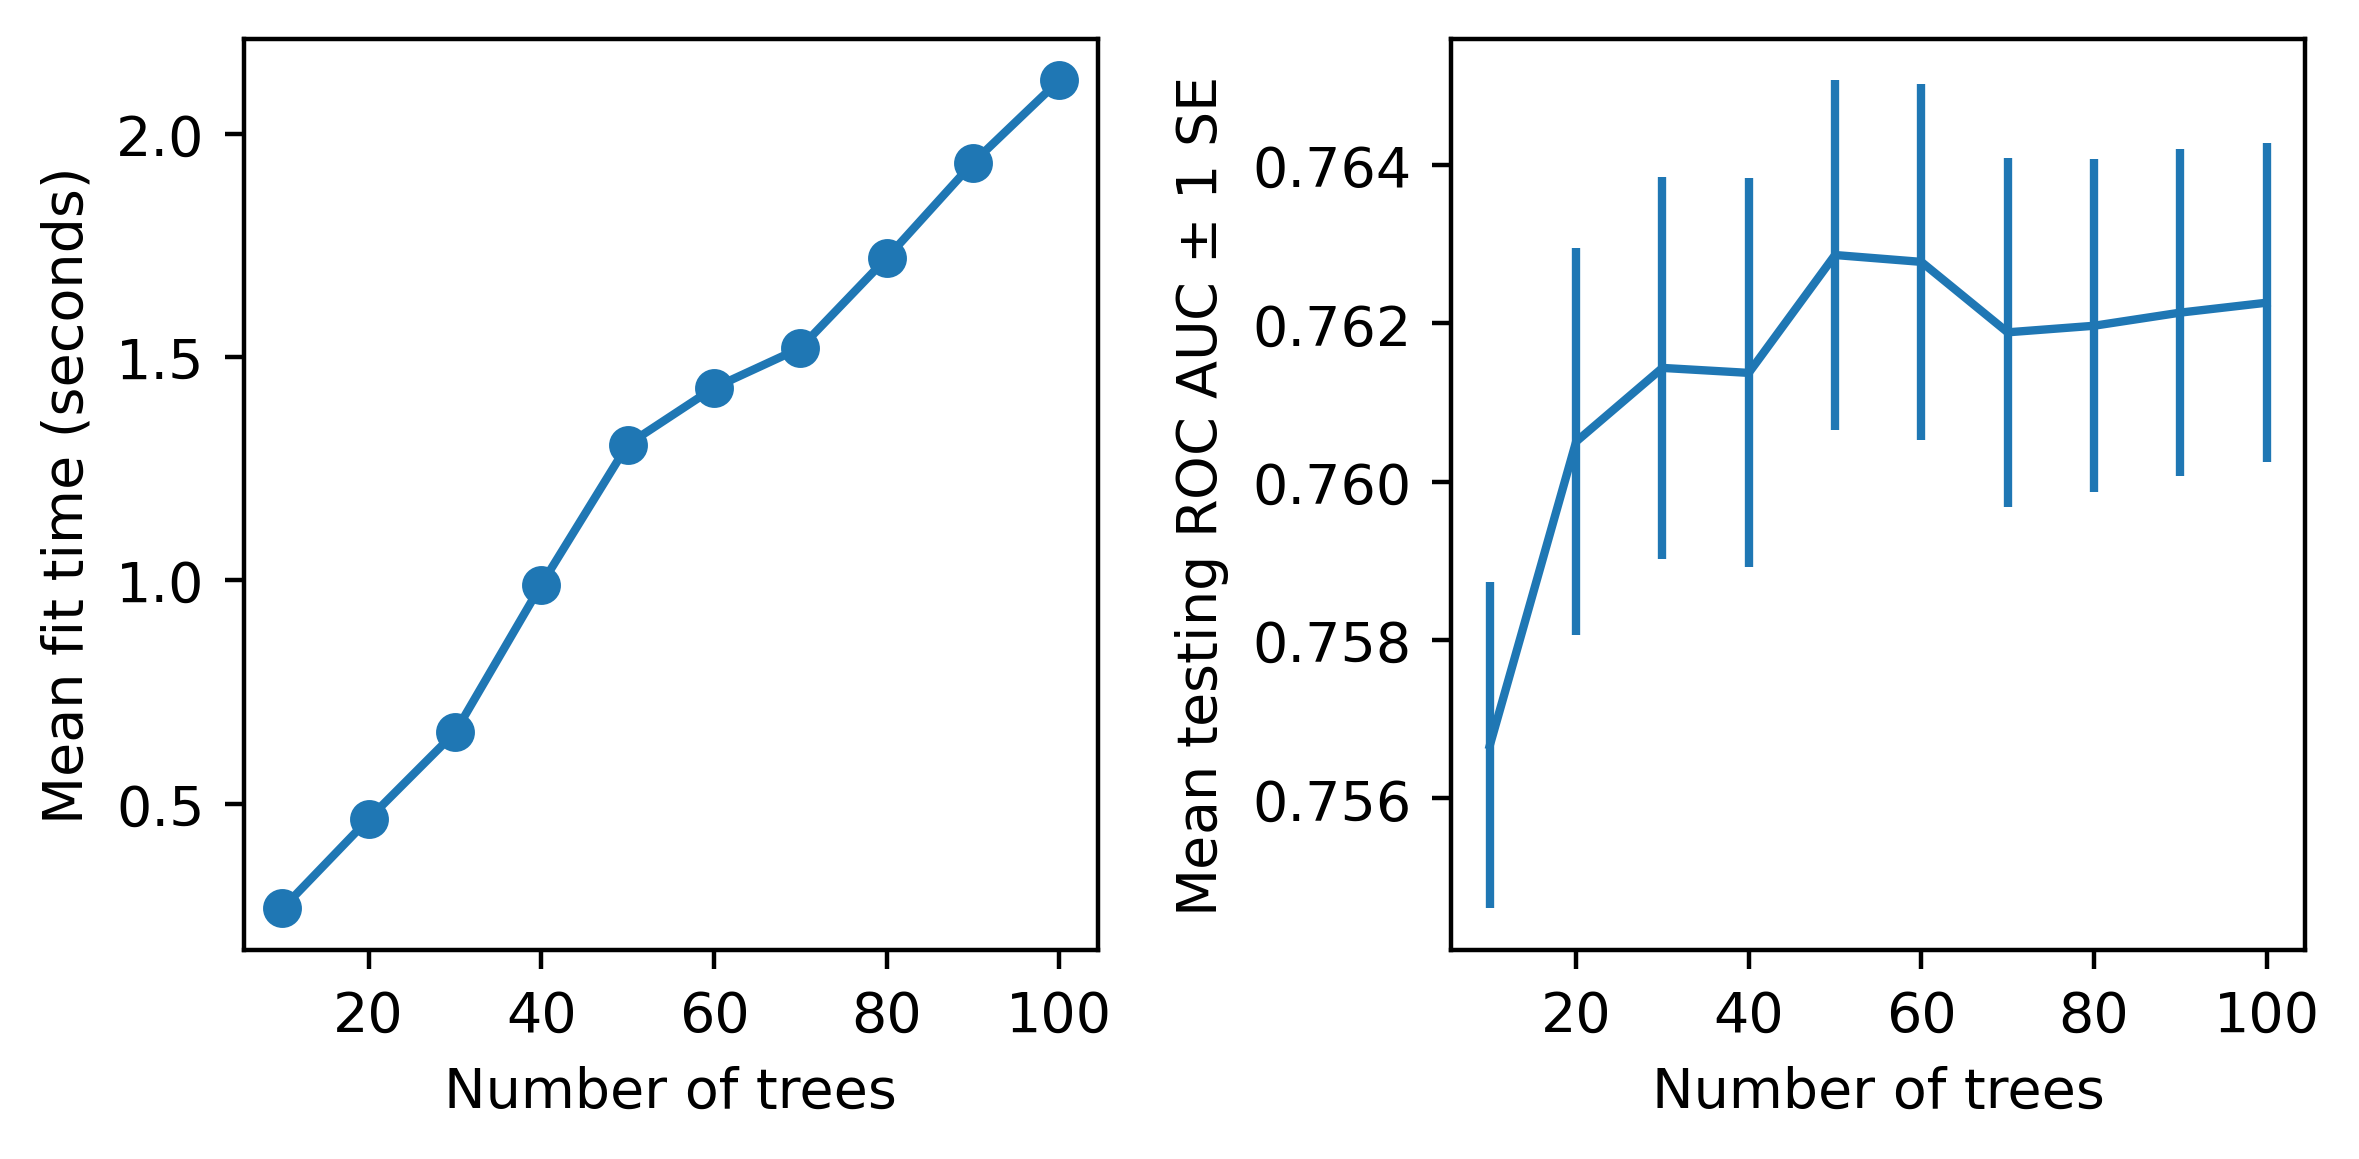

In [26]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_fit_time'],
'-o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
cv_rf_ex_results_df['mean_test_score'],
yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4))
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE ')
plt.tight_layout()
plt.show()

**5. Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham
số tốt nhất**

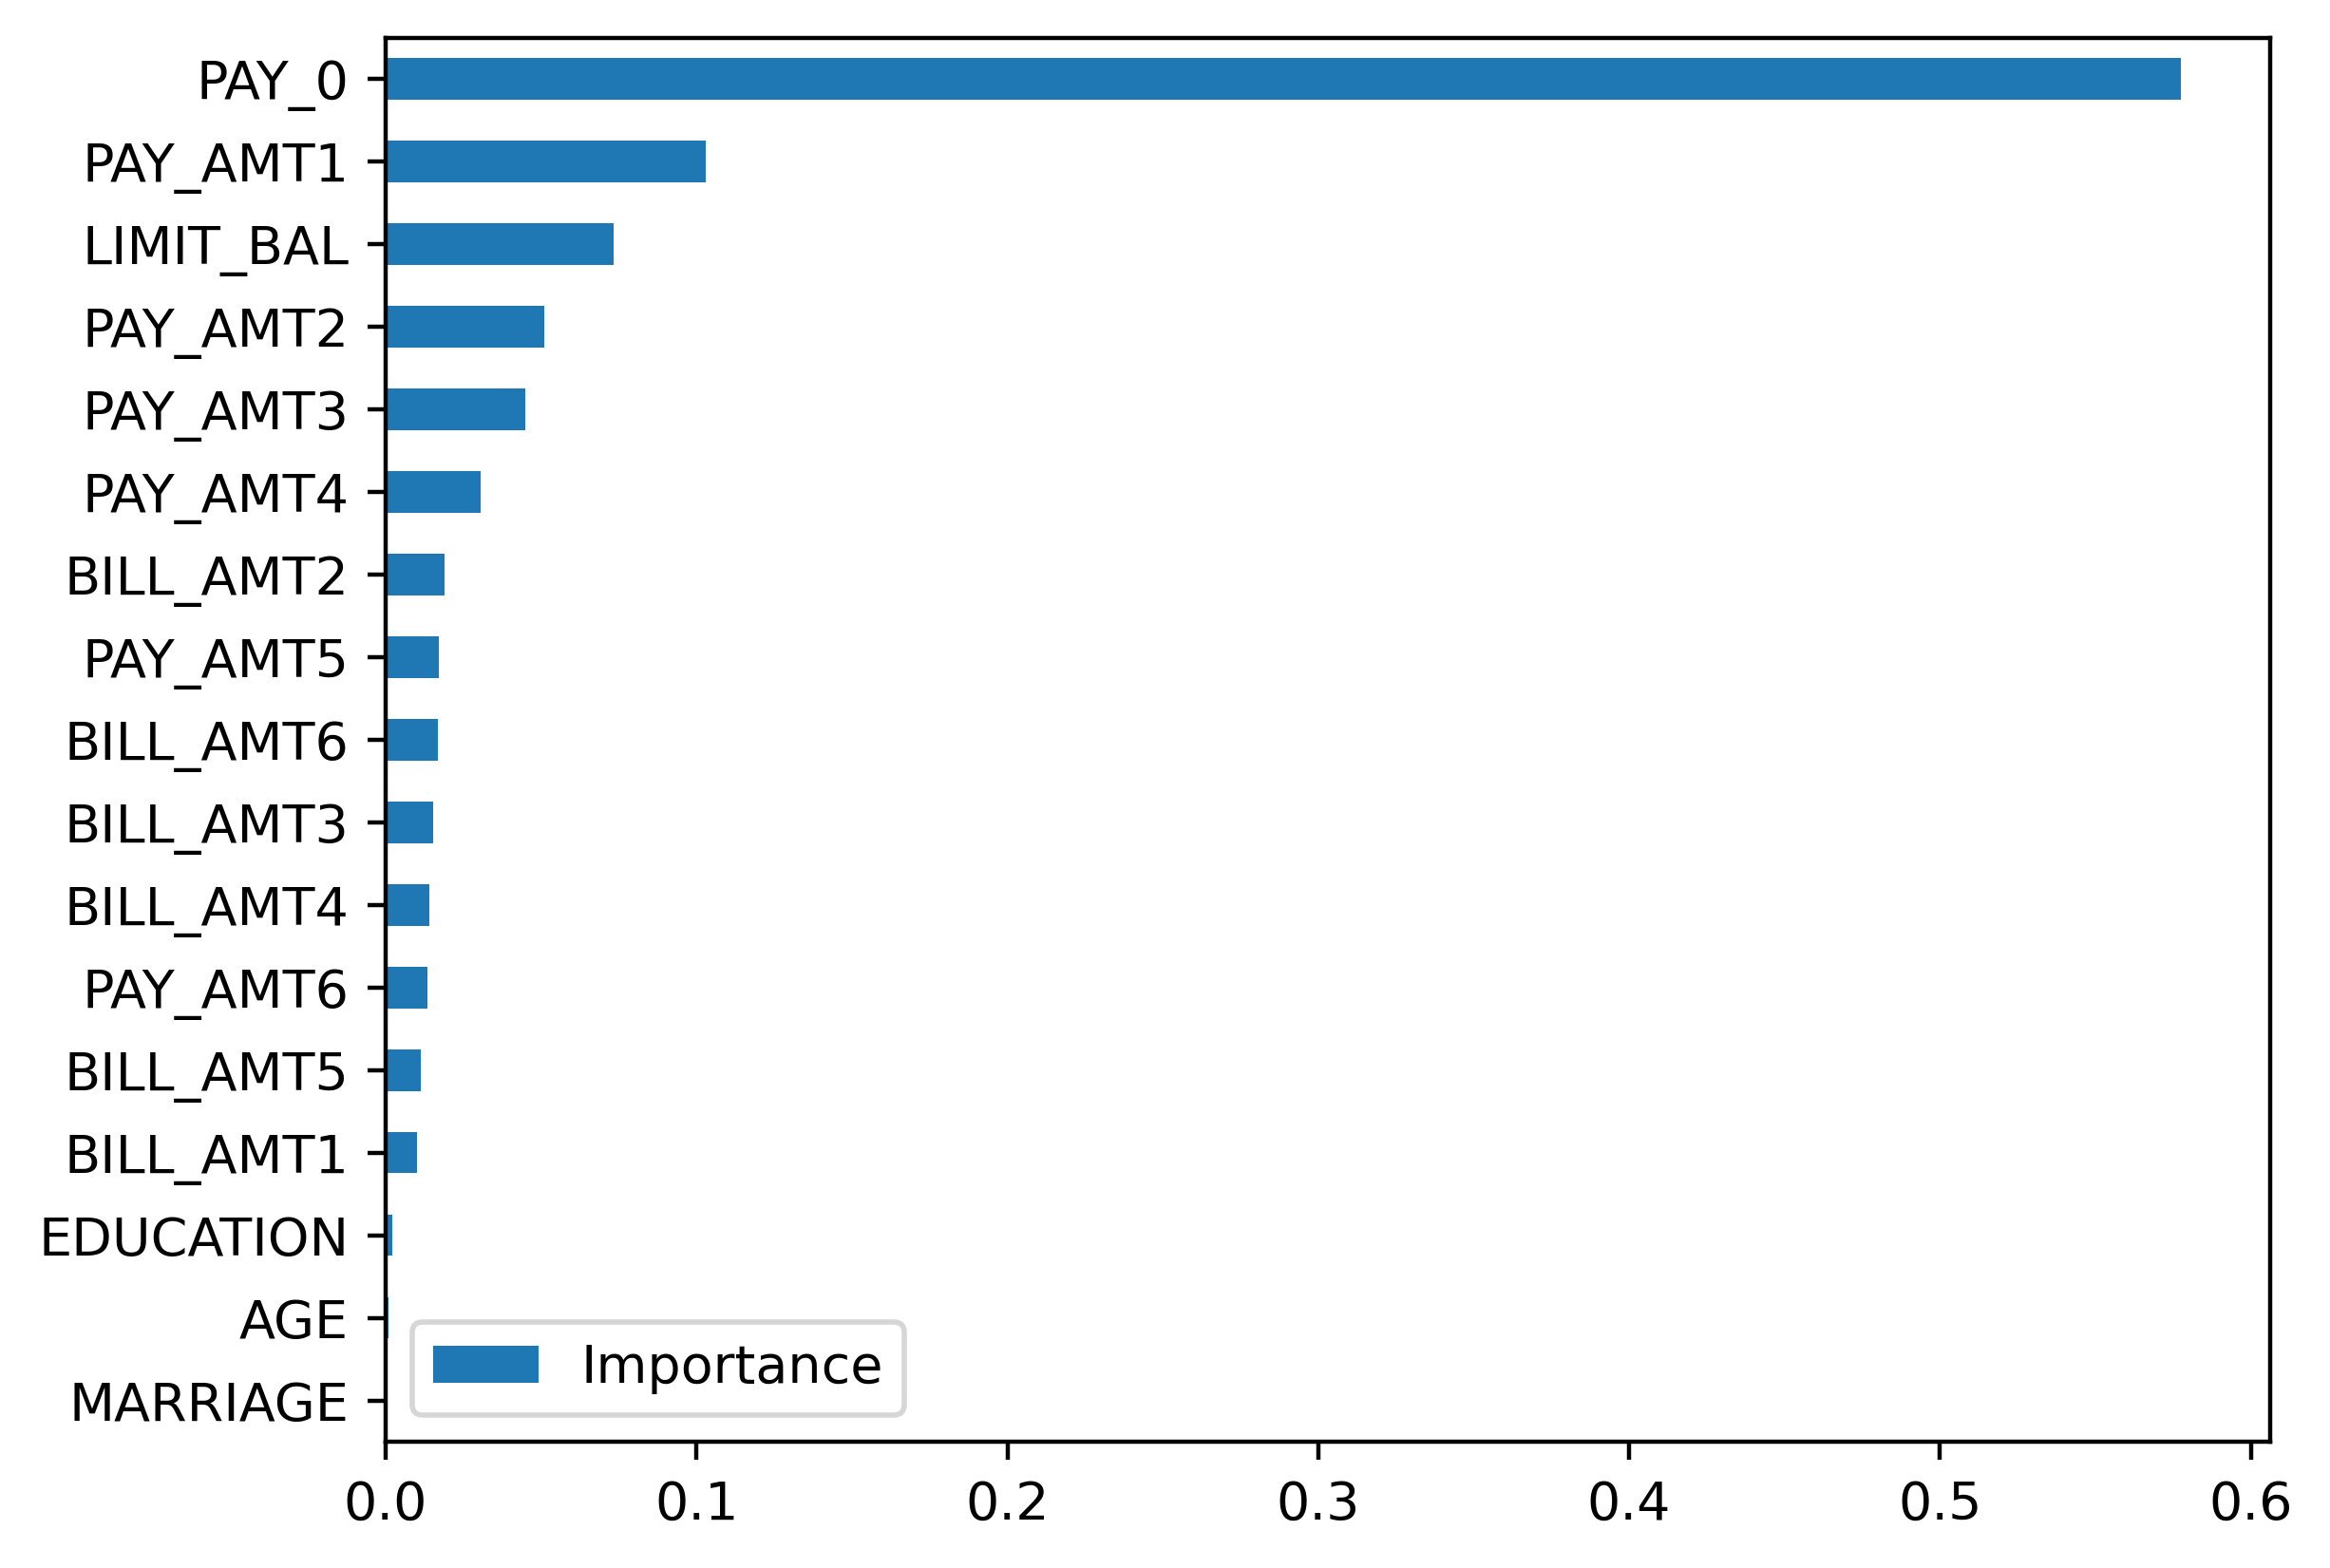

In [29]:
# {'n_estimators': 50}
cv_rf_ex.best_params_
# the feature names and importances
feat_imp_df = pd.DataFrame({
'Importance':cv_rf_ex.best_estimator_.feature_importances_},
index=features_response[:-1])
feat_imp_df.sort_values('Importance', ascending=True).plot.barh()
plt.show()

### 2.1.3. Bài tập thực hành 1

Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic lấy từ
https://www.kaggle.com/code/dmilla/introduction-to-decision-trees-titanic-dataset

Mục tiêu của dự án này là xây dựng và so sánh các mô hình Cây quyết định (Decision Tree) và Rừng ngẫu nhiên (Random Forest) trên bộ dữ liệu Titanic để vừa đạt hiệu năng dự đoán tốt vừa rút ra các insight giải thích được. Quy trình bao gồm: tiền xử lý dữ liệu và kỹ thuật tạo đặc trưng (feature engineering), chọn tập đặc trưng phù hợp, huấn luyện mô hình với cross‑validation để tránh overfitting, tối ưu tham số, đánh giá hiệu năng bằng các chỉ số phù hợp và trực quan hóa cấu trúc cây cùng tầm quan trọng của đặc trưng. Kết quả kỳ vọng không chỉ là một mô hình có độ chính xác cao mà còn là các quy tắc dễ hiểu giúp giải thích những yếu tố ảnh hưởng đến khả năng sống sót của hành khách.

#### 1. Import thư viện

In [1]:
import numpy as np                    # Tính toán số học
import pandas as pd                   # Xử lý dữ liệu dạng bảng
import matplotlib.pyplot as plt       # Vẽ biểu đồ
import seaborn as sns                 # Vẽ biểu đồ thống kê đẹp hơn

# Cấu hình hiển thị
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100

# Thư viện Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

# Bỏ qua cảnh báo
import warnings
warnings.filterwarnings('ignore')

print("✅ Import thư viện thành công!")

✅ Import thư viện thành công!


#### 2. Tải và khám phá dữ liệu

In [2]:
df = pd.read_csv('dataset/train.csv')

print("=" * 80)
print("📊 THÔNG TIN DỮ LIỆU TITANIC")
print("=" * 80)

# Hiển thị 5 dòng đầu
print("\n🔹 5 dòng đầu tiên:")
print(df.head())

# Thông tin tổng quan
print("\n🔹 Thông tin dataset:")
print(f"- Số dòng: {df.shape[0]}")
print(f"- Số cột: {df.shape[1]}")
print(f"\n- Chi tiết các cột:")
print(df.info())

# Thống kê mô tả
print("\n🔹 Thống kê mô tả:")
print(df.describe())

# Kiểm tra giá trị thiếu
print("\n🔹 Giá trị thiếu trong từng cột:")
print(df.isnull().sum())

# Phân bố biến mục tiêu (Survived)
print("\n🔹 Phân bố biến mục tiêu (Survived):")
print(df['Survived'].value_counts())
print(f"\nTỉ lệ sống sót: {df['Survived'].mean()*100:.2f}%")


📊 THÔNG TIN DỮ LIỆU TITANIC

🔹 5 dòng đầu tiên:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      

#### 3. Phân tích dữ liệu EDA

In [14]:
print(f"\n🔹 Tổng quan dataset:")
print(f"   - Số dòng: {df.shape[0]}")
print(f"   - Số cột: {df.shape[1]}")
print(f"   - Tên các cột: {df.columns.tolist()}")
# Đổi tên tất cả cột về chữ thường
df.columns = df.columns.str.lower()


🔹 Tổng quan dataset:
   - Số dòng: 891
   - Số cột: 12
   - Tên các cột: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


##### Phân bố biến mục tiêu


1️⃣ PHÂN BỐ BIẾN MỤC TIÊU (SURVIVED)


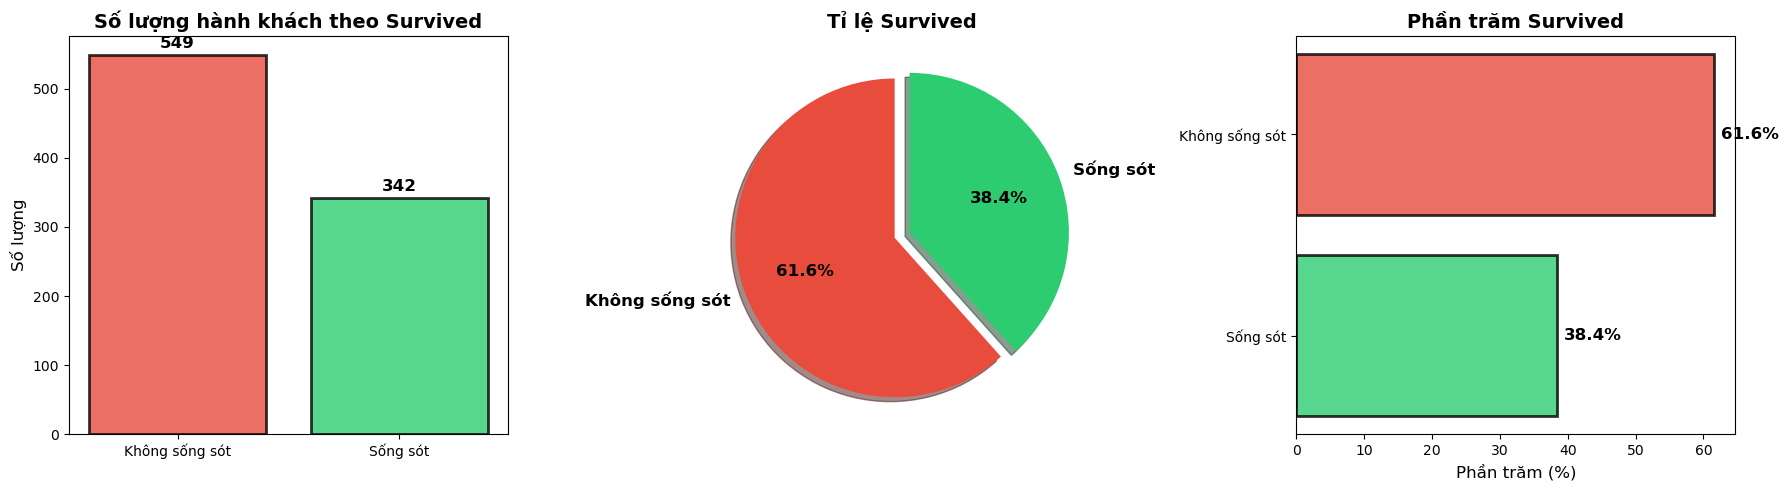


📊 Tỉ lệ sống sót: 38.38%
📊 Tỉ lệ tử vong: 61.62%


In [17]:
print("\n" + "=" * 80)
print("1️⃣ PHÂN BỐ BIẾN MỤC TIÊU (SURVIVED)")
print("=" * 80)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1.1 Count plot
survived_counts = df['survived'].value_counts()
axes[0].bar(['Không sống sót', 'Sống sót'], survived_counts.values, 
           color=['#e74c3c', '#2ecc71'], alpha=0.8, edgecolor='black', linewidth=2)
axes[0].set_title('Số lượng hành khách theo Survived', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Số lượng', fontsize=12)
for i, v in enumerate(survived_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontsize=12, fontweight='bold')

# 1.2 Pie chart
axes[1].pie(survived_counts.values, labels=['Không sống sót', 'Sống sót'],
           autopct='%1.1f%%', colors=['#e74c3c', '#2ecc71'], startangle=90,
           explode=(0.05, 0.05), shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Tỉ lệ Survived', fontsize=14, fontweight='bold')

# 1.3 Percentage bar
survived_pct = df['survived'].value_counts(normalize=True) * 100
axes[2].barh(['Sống sót', 'Không sống sót'], 
            [survived_pct[1], survived_pct[0]],
            color=['#2ecc71', '#e74c3c'], alpha=0.8, edgecolor='black', linewidth=2)
axes[2].set_title('Phần trăm Survived', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Phần trăm (%)', fontsize=12)
for i, v in enumerate([survived_pct[1], survived_pct[0]]):
    axes[2].text(v + 1, i, f'{v:.1f}%', va='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n📊 Tỉ lệ sống sót: {df['survived'].mean()*100:.2f}%")
print(f"📊 Tỉ lệ tử vong: {(1-df['survived'].mean())*100:.2f}%")

##### Phân tích từng biến số


📊 PHÂN TÍCH TẤT CẢ CÁC BIẾN SỐ

🔹 Sẽ phân tích 6 biến số:
   ['passengerid', 'pclass', 'age', 'sibsp', 'parch', 'fare']


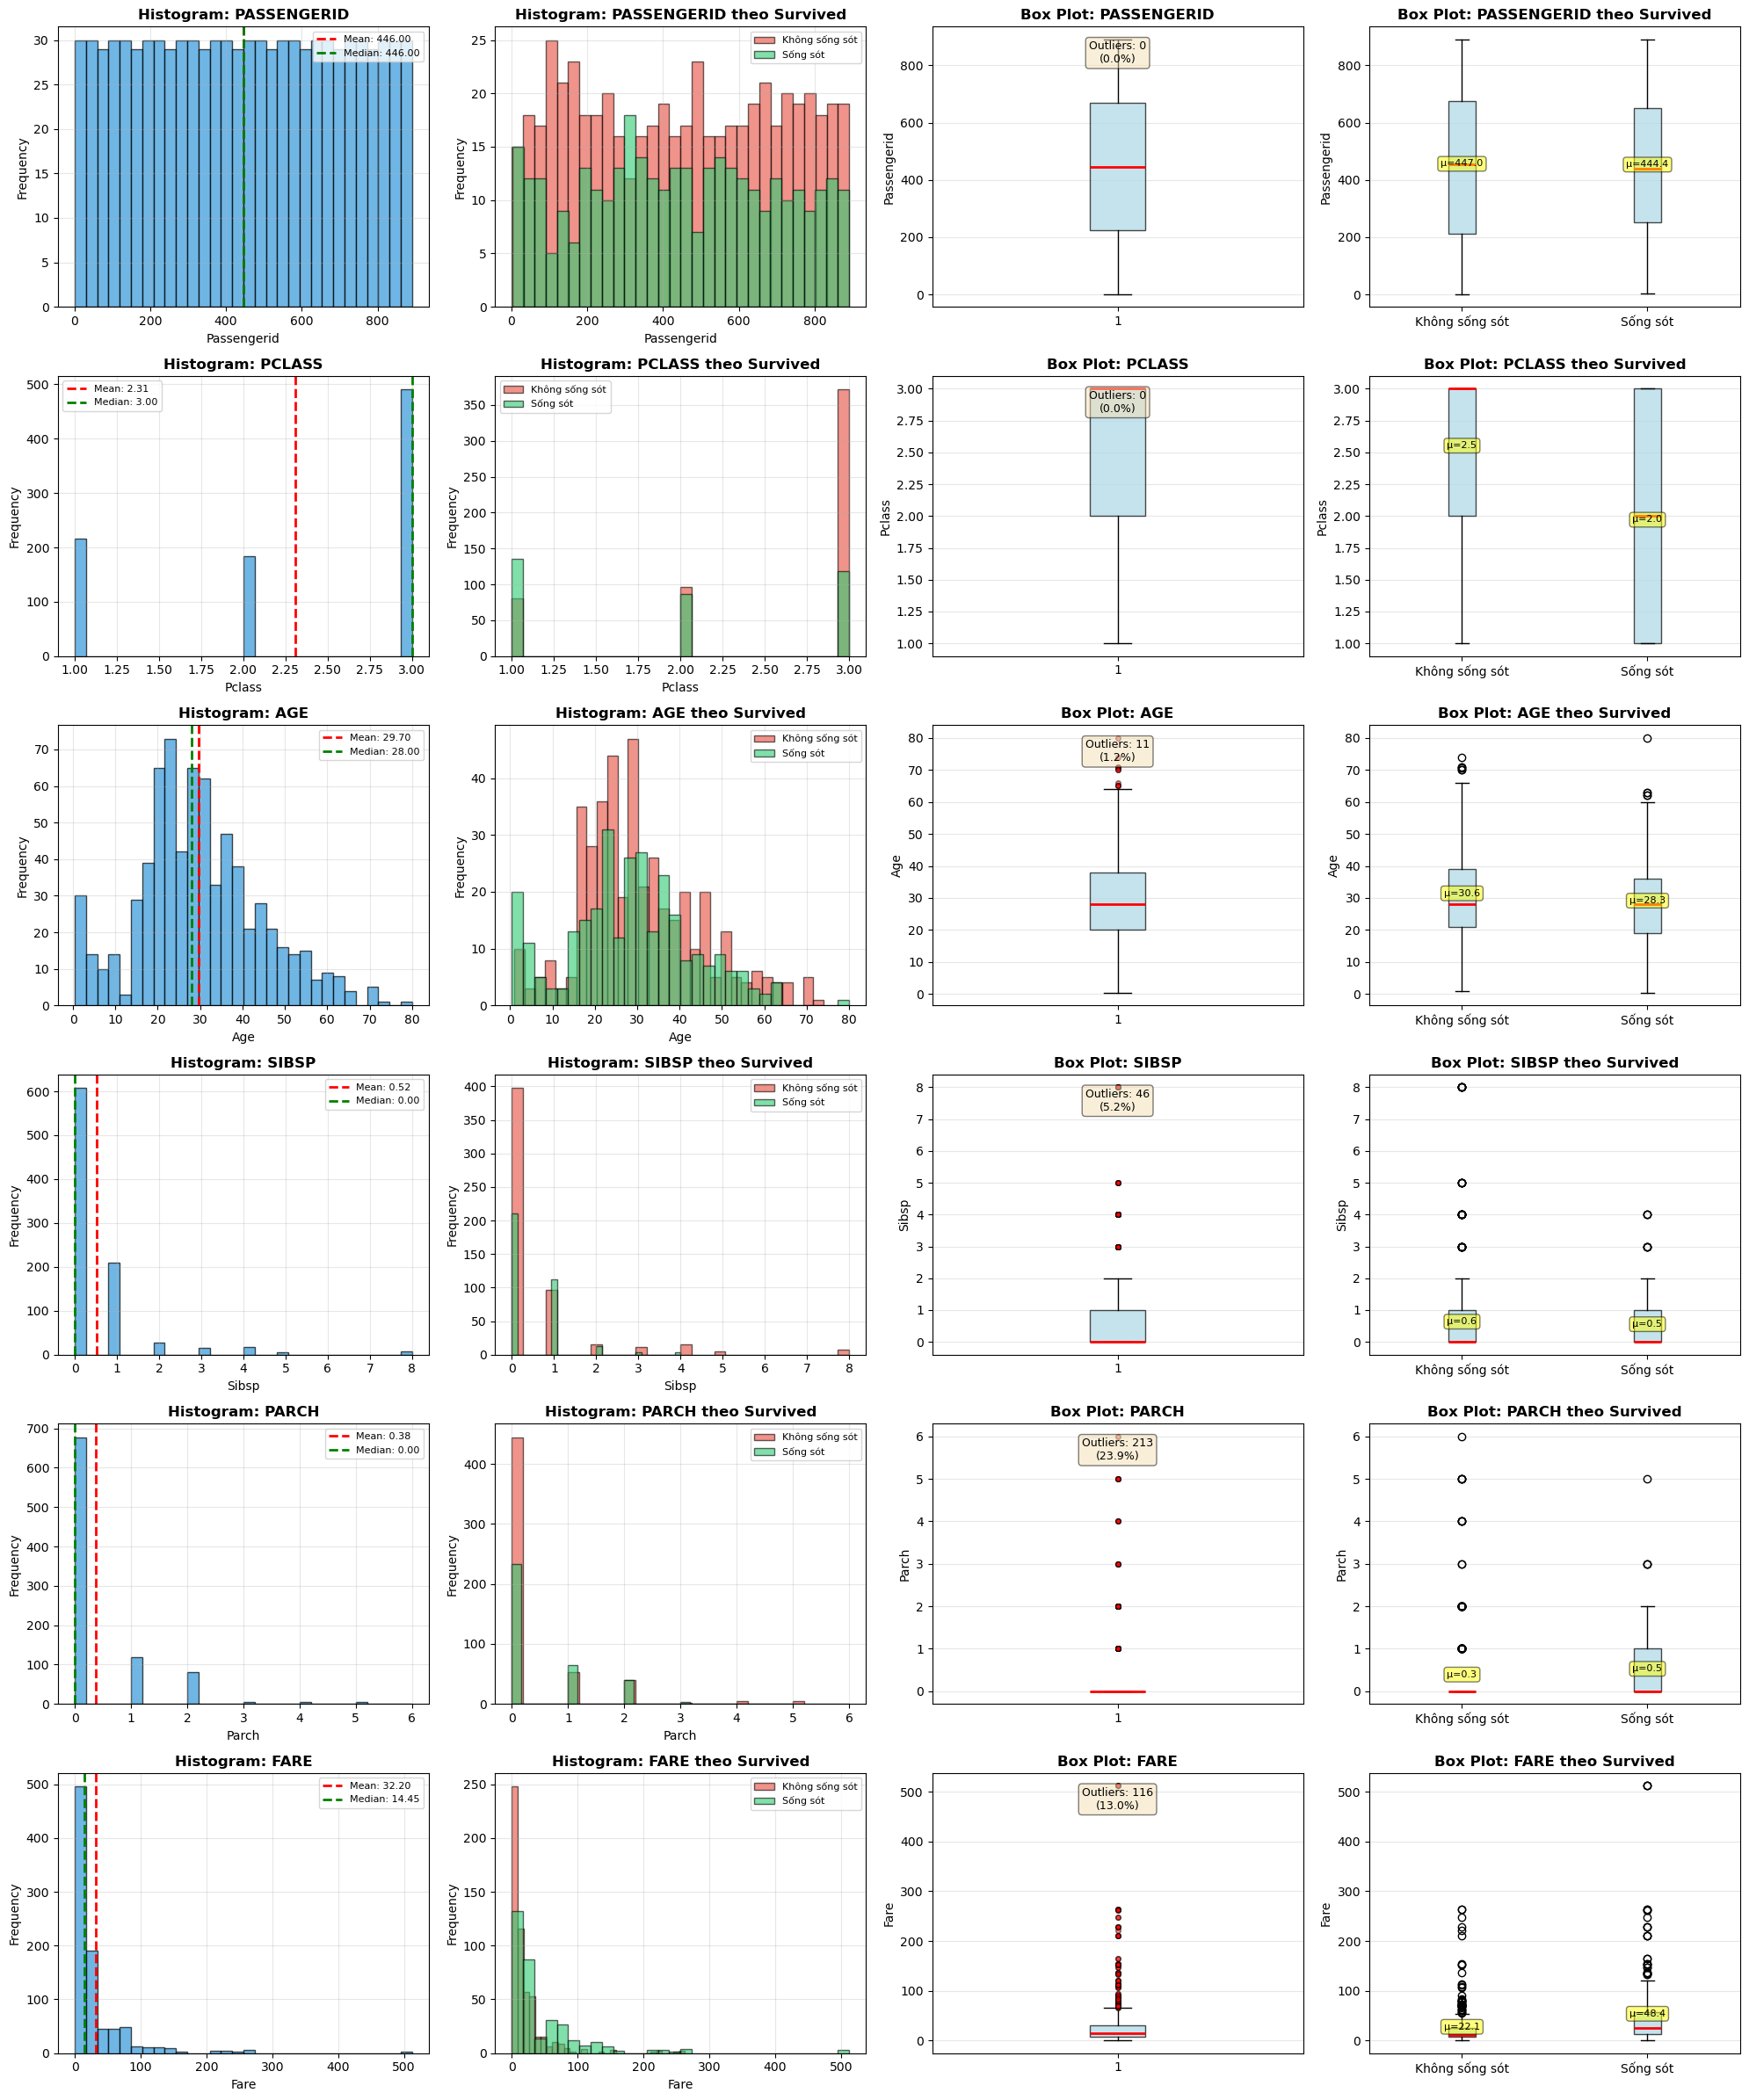


📊 THỐNG KÊ CHI TIẾT CÁC BIẾN SỐ:

📈 PASSENGERID:

1. Thống kê tổng thể:
count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: passengerid, dtype: float64

2. Thống kê theo Survived:
          count        mean         std  min     25%    50%    75%    max
survived                                                                 
0         549.0  447.016393  260.640469  1.0  211.00  455.0  675.0  891.0
1         342.0  444.368421  252.358840  2.0  250.75  439.5  651.5  890.0

3. Missing values: 0 (0.00%)

4. Outliers (IQR method):
   - Lower bound: -444.00
   - Upper bound: 1336.00
   - Số outliers: 0 (0.00%)

5. Correlation với Survived: -0.0050
   ⚠️ Correlation yếu

6. T-test (khác biệt giữa 2 nhóm):
   - t-statistic: 0.1493
   - p-value: 0.881366
   ⚠️ Không có sự khác biệt có ý nghĩa thống kê

📈 PCLASS:

1. Thống kê tổng thể:
count    891.000000
mean       2.308642
std   

In [22]:
print("\n" + "=" * 80)
print("📊 PHÂN TÍCH TẤT CẢ CÁC BIẾN SỐ")
print("=" * 80)

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# Loại bỏ 'survived' khỏi danh sách biến số để phân tích
numeric_features = [col for col in numeric_cols if col != 'survived']

print(f"\n🔹 Sẽ phân tích {len(numeric_features)} biến số:")
print(f"   {numeric_features}")

# Tính số hàng cần thiết
n_features = len(numeric_features)
n_cols = 4  # 2 cột cho histogram, 2 cột cho boxplot
n_rows = n_features

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))

# Đảm bảo axes là 2D array
if n_rows == 1:
    axes = axes.reshape(1, -1)

for idx, feature in enumerate(numeric_features):
    row = idx
    
    # 1. Histogram tổng thể
    ax1 = axes[row, 0]
    df[feature].hist(bins=30, ax=ax1, color='#3498db', edgecolor='black', alpha=0.7)
    ax1.set_title(f'Histogram: {feature.upper()}', fontsize=12, fontweight='bold')
    ax1.set_xlabel(feature.capitalize(), fontsize=10)
    ax1.set_ylabel('Frequency', fontsize=10)
    ax1.grid(alpha=0.3)
    
    # Thêm thống kê
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax1.legend(fontsize=8)
    
    # 2. Histogram theo Survived
    ax2 = axes[row, 1]
    df[df['survived']==0][feature].hist(bins=30, alpha=0.6, label='Không sống sót', 
                                        color='#e74c3c', ax=ax2, edgecolor='black')
    df[df['survived']==1][feature].hist(bins=30, alpha=0.6, label='Sống sót', 
                                        color='#2ecc71', ax=ax2, edgecolor='black')
    ax2.set_title(f'Histogram: {feature.upper()} theo Survived', fontsize=12, fontweight='bold')
    ax2.set_xlabel(feature.capitalize(), fontsize=10)
    ax2.set_ylabel('Frequency', fontsize=10)
    ax2.legend(fontsize=8)
    ax2.grid(alpha=0.3)
    
    # 3. Box plot tổng thể
    ax3 = axes[row, 2]
    bp = ax3.boxplot(df[feature].dropna(), patch_artist=True, vert=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2),
                     flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
    ax3.set_title(f'Box Plot: {feature.upper()}', fontsize=12, fontweight='bold')
    ax3.set_ylabel(feature.capitalize(), fontsize=10)
    ax3.grid(axis='y', alpha=0.3)
    
    # Thêm thống kê outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[feature] < Q1 - 1.5*IQR) | (df[feature] > Q3 + 1.5*IQR)][feature]
    n_outliers = len(outliers)
    ax3.text(0.5, 0.95, f'Outliers: {n_outliers}\n({n_outliers/len(df)*100:.1f}%)', 
            transform=ax3.transAxes, fontsize=9,
            verticalalignment='top', horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # 4. Box plot theo Survived
    ax4 = axes[row, 3]
    survived_data = [df[df['survived']==0][feature].dropna(), 
                     df[df['survived']==1][feature].dropna()]
    bp = ax4.boxplot(survived_data, labels=['Không sống sót', 'Sống sót'],
                     patch_artist=True,
                     boxprops=dict(facecolor='lightblue', alpha=0.7),
                     medianprops=dict(color='red', linewidth=2))
    ax4.set_title(f'Box Plot: {feature.upper()} theo Survived', fontsize=12, fontweight='bold')
    ax4.set_ylabel(feature.capitalize(), fontsize=10)
    ax4.grid(axis='y', alpha=0.3)
    
    # Thêm mean values
    for i, survived_val in enumerate([0, 1]):
        mean_val = df[df['survived']==survived_val][feature].mean()
        ax4.text(i+1, mean_val, f'μ={mean_val:.1f}', 
                ha='center', fontsize=8, 
                bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

# In thống kê chi tiết
print("\n📊 THỐNG KÊ CHI TIẾT CÁC BIẾN SỐ:")
for feature in numeric_features:
    print(f"\n{'='*60}")
    print(f"📈 {feature.upper()}:")
    print(f"{'='*60}")
    
    # Thống kê tổng thể
    print("\n1. Thống kê tổng thể:")
    print(df[feature].describe())
    
    # Thống kê theo Survived
    print("\n2. Thống kê theo Survived:")
    print(df.groupby('survived')[feature].describe())
    
    # Kiểm tra missing values
    missing = df[feature].isnull().sum()
    missing_pct = missing / len(df) * 100
    print(f"\n3. Missing values: {missing} ({missing_pct:.2f}%)")
    
    # Kiểm tra outliers
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[feature] < lower) | (df[feature] > upper)][feature]
    print(f"\n4. Outliers (IQR method):")
    print(f"   - Lower bound: {lower:.2f}")
    print(f"   - Upper bound: {upper:.2f}")
    print(f"   - Số outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    
    # Correlation với survived
    corr = df[[feature, 'survived']].corr().iloc[0, 1]
    print(f"\n5. Correlation với Survived: {corr:.4f}")
    if abs(corr) > 0.3:
        print(f"   ⭐ Correlation mạnh!")
    elif abs(corr) > 0.1:
        print(f"   ✓ Correlation trung bình")
    else:
        print(f"   ⚠️ Correlation yếu")
    
    # T-test để kiểm tra sự khác biệt giữa survived=0 và survived=1
    from scipy import stats
    group0 = df[df['survived']==0][feature].dropna()
    group1 = df[df['survived']==1][feature].dropna()
    if len(group0) > 0 and len(group1) > 0:
        t_stat, p_value = stats.ttest_ind(group0, group1)
        print(f"\n6. T-test (khác biệt giữa 2 nhóm):")
        print(f"   - t-statistic: {t_stat:.4f}")
        print(f"   - p-value: {p_value:.6f}")
        if p_value < 0.05:
            print(f"   ⭐ Có sự khác biệt có ý nghĩa thống kê (p < 0.05)")
        else:
            print(f"   ⚠️ Không có sự khác biệt có ý nghĩa thống kê")

#### 4. Ma trận tương quan

🔧 Đang encode các cột categorical...
   ✅ Đã encode Sex -> Sex_encoded
   ✅ Đã encode Embarked -> Embarked_encoded
   ✅ Đã encode Cabin -> Cabin_encoded
   ✅ Đã encode Ticket -> Ticket_encoded
   ✅ Đã encode Name -> Name_encoded

📊 Tổng số cột số: 12
📊 Các cột số: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded', 'Embarked_encoded', 'Cabin_encoded', 'Ticket_encoded', 'Name_encoded']


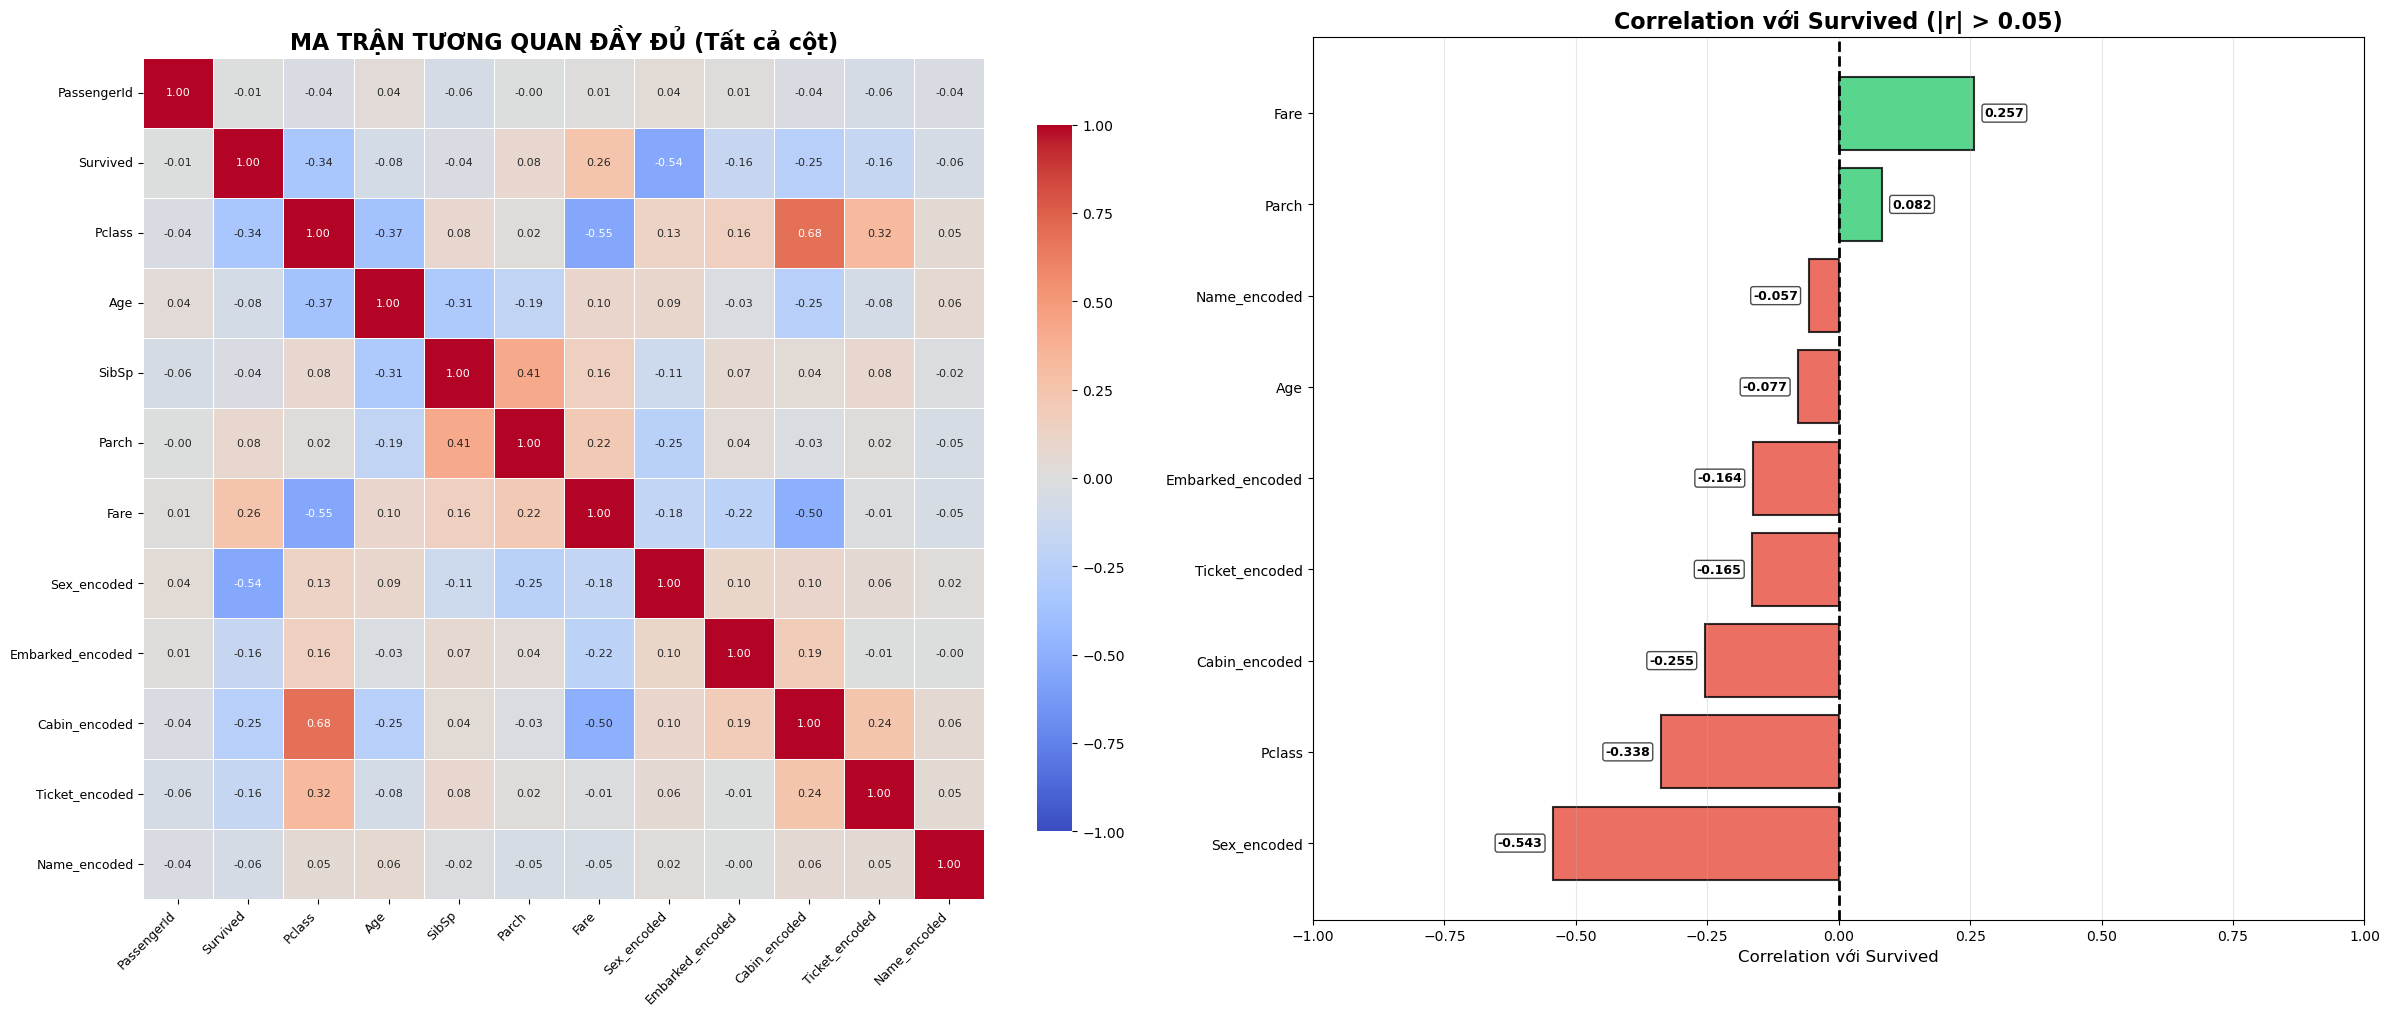


📊 MA TRẬN TƯƠNG QUAN ĐẦY ĐỦ
Kích thước: (12, 12)
Số lượng biến: 12

📈 CORRELATION VỚI SURVIVED (TOP 15)
 1. 🔴 ↘️ Sex_encoded         :  -0.543 (RẤT MẠNH)
 2. 🔴 ↘️ Pclass              :  -0.338 (MẠNH)
 3. 🟢 ↗️ Fare                :   0.257 (TRUNG BÌNH)
 4. 🔴 ↘️ Cabin_encoded       :  -0.255 (TRUNG BÌNH)
 5. 🔴 ↘️ Ticket_encoded      :  -0.165 (TRUNG BÌNH)
 6. 🔴 ↘️ Embarked_encoded    :  -0.164 (TRUNG BÌNH)
 7. 🟢 ↗️ Parch               :   0.082 (YẾU)
 8. 🔴 ↘️ Age                 :  -0.077 (YẾU)
 9. 🔴 ↘️ Name_encoded        :  -0.057 (YẾU)
10. 🔴 ↘️ SibSp               :  -0.035 (YẾU)
11. 🔴 ↘️ PassengerId         :  -0.005 (YẾU)

📋 THỐNG KÊ TỔNG QUAN
Tổng số biến: 12
Số correlation > 0.7: 0
Số correlation > 0.5: 4
Số correlation > 0.3: 9

🔧 Các cột đã được encode:
   Sex        -> Sex_encoded
   Embarked   -> Embarked_encoded
   Cabin      -> Cabin_encoded
   Ticket     -> Ticket_encoded
   Name       -> Name_encoded


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Tạo bản copy để xử lý
df = pd.read_csv('dataset/train.csv')
df_processed = df.copy()

# 1. ENCODE TẤT CẢ CÁC CỘT CATEGORICAL
print("🔧 Đang encode các cột categorical...")

# Danh sách các cột categorical cần encode
categorical_cols = ['Sex', 'Embarked', 'Cabin', 'Ticket', 'Name']

for col in categorical_cols:
    if col in df_processed.columns:
        # Tạo tên cột mới
        new_col_name = f"{col}_encoded"
        
        # Xử lý missing values
        if df_processed[col].isnull().any():
            df_processed[col] = df_processed[col].fillna('Unknown')
        
        # Encode bằng LabelEncoder
        le = LabelEncoder()
        df_processed[new_col_name] = le.fit_transform(df_processed[col].astype(str))
        
        print(f"   ✅ Đã encode {col} -> {new_col_name}")

# 2. LẤY TẤT CẢ CÁC CỘT SỐ (bao gồm cả encoded)
numeric_cols_all = df_processed.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n📊 Tổng số cột số: {len(numeric_cols_all)}")
print(f"📊 Các cột số: {numeric_cols_all}")

# 3. TÍNH CORRELATION MATRIX CHO TẤT CẢ BIẾN SỐ
corr_matrix = df_processed[numeric_cols_all].corr()

# 4. VẼ BIỂU ĐỒ
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# 1. Heatmap đầy đủ
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, ax=axes[0],
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={'fontsize': 8})  # Font nhỏ hơn để fit nhiều cột
axes[0].set_title('MA TRẬN TƯƠNG QUAN ĐẦY ĐỦ (Tất cả cột)', fontsize=16, fontweight='bold')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=9)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=9)

# 2. Correlation với Survived (sửa tên cột thành 'Survived' với chữ S hoa)
survived_col = 'Survived'  # Thử với chữ S hoa
if survived_col not in corr_matrix.columns:
    survived_col = 'survived'  # Fallback về chữ thường

if survived_col in corr_matrix.columns:
    survived_corr = corr_matrix[survived_col].sort_values(ascending=True)
    survived_corr = survived_corr.drop(survived_col)
    
    # Lọc chỉ lấy các correlation có ý nghĩa (|corr| > 0.05)
    meaningful_corr = survived_corr[np.abs(survived_corr) > 0.05]
    
    # Giới hạn số lượng hiển thị nếu quá nhiều
    if len(meaningful_corr) > 15:
        meaningful_corr = meaningful_corr.nlargest(10).combine_first(meaningful_corr.nsmallest(5))
        meaningful_corr = meaningful_corr.sort_values(ascending=True)
    
    colors = ['#2ecc71' if x > 0 else '#e74c3c' for x in meaningful_corr.values]
    bars = axes[1].barh(range(len(meaningful_corr)), meaningful_corr.values,
                       color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
    axes[1].set_yticks(range(len(meaningful_corr)))
    axes[1].set_yticklabels(meaningful_corr.index, fontsize=10)
    axes[1].set_xlabel('Correlation với Survived', fontsize=12)
    axes[1].set_title(f'Correlation với {survived_col} (|r| > 0.05)', fontsize=16, fontweight='bold')
    axes[1].axvline(x=0, color='black', linestyle='--', linewidth=2)
    axes[1].grid(axis='x', alpha=0.3)
    axes[1].set_xlim(-1, 1)  # Giới hạn trục X
    
    # Thêm giá trị
    for i, v in enumerate(meaningful_corr.values):
        axes[1].text(v + 0.02 if v > 0 else v - 0.02, i, f'{v:.3f}', 
                    va='center', ha='left' if v > 0 else 'right', 
                    fontsize=9, fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.7))
    
else:
    axes[1].text(0.5, 0.5, f'Không tìm thấy cột "{survived_col}"', 
                ha='center', va='center', transform=axes[1].transAxes, fontsize=14)
    axes[1].set_title('Correlation với Survived', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# 5. IN THÔNG TIN CHI TIẾT
print("\n" + "="*80)
print("📊 MA TRẬN TƯƠNG QUAN ĐẦY ĐỦ")
print("="*80)
print(f"Kích thước: {corr_matrix.shape}")
print(f"Số lượng biến: {len(corr_matrix.columns)}")

if survived_col in corr_matrix.columns:
    print("\n" + "="*80)
    print("📈 CORRELATION VỚI SURVIVED (TOP 15)")
    print("="*80)
    
    survived_corr_all = corr_matrix[survived_col].drop(survived_col)
    survived_corr_sorted = survived_corr_all.reindex(
        survived_corr_all.abs().sort_values(ascending=False).index
    )
    
    # Hiển thị top 15
    for i, (feature, corr_value) in enumerate(survived_corr_sorted.head(15).items()):
        arrow = "🟢 ↗️" if corr_value > 0 else "🔴 ↘️"
        strength = "RẤT MẠNH" if abs(corr_value) > 0.5 else "MẠNH" if abs(corr_value) > 0.3 else "TRUNG BÌNH" if abs(corr_value) > 0.1 else "YẾU"
        print(f"{i+1:2d}. {arrow} {feature:20}: {corr_value:7.3f} ({strength})")

# 6. THỐNG KÊ CORRELATION
print("\n" + "="*80)
print("📋 THỐNG KÊ TỔNG QUAN")
print("="*80)
print(f"Tổng số biến: {len(corr_matrix.columns)}")
print(f"Số correlation > 0.7: {((np.abs(corr_matrix) > 0.7).sum().sum() - len(corr_matrix.columns)) // 2}")
print(f"Số correlation > 0.5: {((np.abs(corr_matrix) > 0.5).sum().sum() - len(corr_matrix.columns)) // 2}")
print(f"Số correlation > 0.3: {((np.abs(corr_matrix) > 0.3).sum().sum() - len(corr_matrix.columns)) // 2}")

# Hiển thị các cột đã được encode
print(f"\n🔧 Các cột đã được encode:")
encoded_cols = [col for col in df_processed.columns if col.endswith('_encoded')]
for col in encoded_cols:
    original_col = col.replace('_encoded', '')
    print(f"   {original_col:10} -> {col}")

Biểu đồ nhiệt này rất hữu ích cho việc quan sát ban đầu vì bạn có thể dễ dàng nắm bắt được giá trị dự đoán của từng đặc trưng. Trong trường hợp này, sex và title thể hiện mối tương quan cao nhất (theo giá trị tuyệt đối) với lớp (Sống sót): lần lượt là 0.54 và 0.49. Nhưng mối tương quan tuyệt đối giữa cả hai cũng rất cao (0.86, cao nhất trong tập dữ liệu của chúng ta), vì vậy có lẽ chúng đang mang cùng một thông tin và việc sử dụng cả hai làm đầu vào cho cùng một mô hình sẽ không phải là một ý tưởng hay. Rất có thể một trong số chúng sẽ được sử dụng cho nút đầu tiên trong cây quyết định cuối cùng của chúng ta, vì vậy trước tiên hãy khám phá sâu hơn các đặc trưng này và so sánh chúng.

#### Title và Sex

Có thể dễ dàng so sánh các đặc trưng và mối quan hệ của chúng với lớp mục tiêu bằng cách nhóm chúng lại và tính toán một số thống kê cơ bản cho từng nhóm. Đoạn mã dưới đây thực hiện chính xác điều này chỉ trong một dòng và giải thích ý nghĩa của từng chỉ số khi làm việc với lớp nhị phân.

In [49]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])
# Since "Survived" is a binary class (0 or 1), these metrics grouped by the Title feature represent:
    # MEAN: survival rate
    # COUNT: total observations
    # SUM: people survived

# title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5} 

Title  Survived           
             mean count  sum
0     1  0.156673   517   81
1     2  0.575000    40   23
2     3  0.793651   126  100
3     4  0.702703   185  130
4     5  0.347826    23    8

In [50]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).agg(['mean', 'count', 'sum'])
# Since Survived is a binary feature, this metrics grouped by the Sex feature represent:
    # MEAN: survival rate
    # COUNT: total observations
    # SUM: people survived
    
# sex_mapping = {{'female': 0, 'male': 1}} 

Sex  Survived           
           mean count  sum
0   0  0.742038   314  233
1   1  0.188908   577  109

Dữ liệu cho thấy tỷ lệ sống sót của 'Mr' (15,67%) thấp hơn so với nam giới nói chung (18,89%): do đó, Title dường như hữu ích hơn Sex cho mục đích của chúng ta. Điều này có thể là do Title trong hầu hết các trường hợp đã ngầm bao gồm thông tin về Sex. Để xác minh điều này, chúng ta có thể sử dụng bản sao mà chúng ta đã tạo ra của dữ liệu huấn luyện gốc không có ánh xạ và kiểm tra phân phối của Sex được nhóm theo Title.

In [51]:
# Let's use our 'original_train' dataframe to check the sex distribution for each title.
# We use copy() again to prevent modifications in out original_train dataset
title_and_sex = original_train.copy()[['Name', 'Sex']]

# Create 'Title' feature
title_and_sex['Title'] = title_and_sex['Name'].apply(get_title)

# Map 'Sex' as binary feature
title_and_sex['Sex'] = title_and_sex['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Table with 'Sex' distribution grouped by 'Title'
title_and_sex[['Title', 'Sex']].groupby(['Title'], as_index=False).agg(['mean', 'count', 'sum'])

# Since Sex is a binary feature, this metrics grouped by the Title feature represent:
    # MEAN: percentage of men
    # COUNT: total observations
    # SUM: number of men

Title       Sex           
                  mean count  sum
0       Capt  1.000000     1    1
1        Col  1.000000     2    2
2   Countess  0.000000     1    0
3        Don  1.000000     1    1
4         Dr  0.857143     7    6
5   Jonkheer  1.000000     1    1
6       Lady  0.000000     1    0
7      Major  1.000000     2    2
8     Master  1.000000    40   40
9       Miss  0.000000   182    0
10      Mlle  0.000000     2    0
11       Mme  0.000000     1    0
12        Mr  1.000000   517  517
13       Mrs  0.000000   125    0
14        Ms  0.000000     1    0
15       Rev  1.000000     6    6
16       Sir  1.000000     1    1

Chúng ta nhận thấy rằng, ngoại trừ một quan sát duy nhất (một nữ giới có danh hiệu 'Dr'), tất cả các quan sát cho một Title cụ thể đều có chung Sex. Do đó, đặc trưng Title đang nắm bắt tất cả thông tin có trong Sex. Ngoài ra, Title có thể có giá trị hơn đối với tác vụ của chúng ta bằng cách nắm bắt các đặc điểm khác của các cá nhân như tuổi tác, tầng lớp xã hội, tính cách, ...

Đúng là bằng cách nhóm các danh hiệu hiếm vào một danh mục duy nhất, chúng ta đang mất một số thông tin liên quan đến Sex. Chúng ta có thể tạo hai danh mục "Rare Male" và "Rare Female", nhưng sự phân tách này gần như vô nghĩa do sự xuất hiện thấp của các Title "Rare" (2.6%, 23 trên 891 mẫu).

Nhờ phân tích chuyên sâu này về các đặc trưng Sex và Title, chúng ta đã thấy rằng, ngay cả khi tương quan của đặc trưng Sex với lớp Survived cao hơn, Title là một đặc trưng phong phú hơn vì nó mang thông tin về Sex nhưng đồng thời cũng bổ sung các đặc điểm khác. Do đó, rất có khả năng Title sẽ là đặc trưng đầu tiên trong cây quyết định cuối cùng của chúng ta, khiến Sex trở nên vô dụng sau sự phân tách ban đầu này.



#### Độ không thuần nhất Gini

Trước khi bắt đầu làm việc với Cây Quyết Định, hãy giải thích ngắn gọn cách chúng hoạt động. Mục tiêu của các thuật toán học của chúng luôn là tìm ra sự phân tách tốt nhất cho mỗi nút của cây. Nhưng việc đo lường "mức độ tốt" của một sự phân tách nhất định là một câu hỏi chủ quan, vì vậy, trong thực tế, các chỉ số khác nhau được sử dụng để đánh giá các lần phân tách. Một chỉ số thường được sử dụng là . Thư viện sklearn mà chúng ta sẽ sử dụng triển khai , một phép đo phổ biến khác, vì vậy hãy giải thích nó.

Độ không thuần nhất Gini đo lường mức độ hỗn loạn của một tập hợp các phần tử. Nó được tính là xác suất gán nhãn sai một phần tử khi giả định rằng phần tử được gán nhãn ngẫu nhiên theo phân phối của tất cả các lớp trong tập hợp. Cây Quyết Định sẽ cố gắng tìm ra sự phân tách làm giảm Độ không thuần nhất Gini nhiều nhất trên hai nút kết quả. Đối với ví dụ Titanic, nó có thể được tính như sau

In [52]:
# Define function to calculate Gini Impurity
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    random_observation_survived_prob = survival_prob
    random_observation_not_survived_prob = (1 - random_observation_survived_prob)
    mislabelling_survided_prob = not_survival_prob * random_observation_survived_prob
    mislabelling_not_survided_prob = survival_prob * random_observation_not_survived_prob
    gini_impurity = mislabelling_survided_prob + mislabelling_not_survided_prob
    return gini_impurity

Hãy sử dụng các đặc trưng Sex và Title của chúng ta làm ví dụ và tính toán xem mỗi lần phân tách sẽ làm giảm Độ không thuần nhất Gini tổng thể bao nhiêu. Đầu tiên, chúng ta cần tính Độ không thuần nhất Gini của nút bắt đầu bao gồm tất cả 891 quan sát trong tập dữ liệu huấn luyện của chúng ta. Vì chỉ có 342 quan sát sống sót, nên xác suất sống sót là khoảng 38,38% (342/891).

In [53]:
# Gini Impurity of starting node
gini_impurity_starting_node = get_gini_impurity(342, 891)
gini_impurity_starting_node

0.47301295786144265

Bây giờ chúng ta sẽ mô phỏng cả hai cách phân tách, tính độ không thuần nhất của các nút kết quả và sau đó thu được Độ không thuần nhất Gini có trọng số sau khi phân tách để đo lường xem mỗi cách phân tách thực sự đã làm giảm độ không thuần nhất bao nhiêu.

Nếu chúng ta phân tách theo Giới tính, chúng ta sẽ có hai nút sau:

Nút nam giới: 577 quan sát với chỉ 109 người sống sót

Nút nữ giới: 314 quan sát với 233 người sống sót

In [54]:
# Gini Impurity decrease of node for 'male' observations
gini_impurity_men = get_gini_impurity(109, 577)
gini_impurity_men

0.3064437162277843

In [55]:
# Gini Impurity decrease if node splited for 'female' observations
gini_impurity_women = get_gini_impurity(233, 314)
gini_impurity_women

0.3828350034484158

In [56]:
# Gini Impurity decrease if node splited by Sex
men_weight = 577/891
women_weight = 314/891
weighted_gini_impurity_sex_split = (gini_impurity_men * men_weight) + (gini_impurity_women * women_weight)

sex_gini_decrease = weighted_gini_impurity_sex_split - gini_impurity_starting_node
sex_gini_decrease

-0.13964795747285214

Nếu chúng ta phân tách theo Title == 1 (== Mr), chúng ta sẽ có hai nút sau:

- Nút chỉ chứa Mr: 517 quan sát với chỉ 81 người sống sót

- Nút chứa các danh xưng khác: 374 quan sát với 261 người sống sót

In [60]:
# Gini Impurity decrease of node for observations with Title == 1 == Mr
gini_impurity_title_1 = get_gini_impurity(81, 517)
gini_impurity_title_1

0.26425329886377663

In [61]:
# Gini Impurity decrease if node splited for observations with Title != 1 != Mr
gini_impurity_title_others = get_gini_impurity(261, 374)
gini_impurity_title_others

0.42170207898424317

In [62]:
# Gini Impurity decrease if node splited for observations with Title == 1 == Mr
title_1_weight = 517/891
title_others_weight = 374/891
weighted_gini_impurity_title_split = (gini_impurity_title_1 * title_1_weight) + (gini_impurity_title_others * title_others_weight)

title_gini_decrease = weighted_gini_impurity_title_split - gini_impurity_starting_node
title_gini_decrease

-0.14267004758907514

Chúng ta nhận thấy rằng đặc trưng Title có khả năng giảm Độ không thuần nhất Gini tốt hơn một chút so với Sex. Điều này xác nhận phân tích trước đây của chúng ta, và bây giờ chúng ta chắc chắn rằng Title sẽ được sử dụng cho lần phân tách đầu tiên. Do đó, Sex sẽ bị bỏ qua vì thông tin đã được bao gồm trong đặc trưng Title. 

#### Tìm độ sâu cây tối ưu với sự trợ giúp của Kiểm định chéo

Sau khi khám phá dữ liệu, chúng ta sẽ tìm hiểu xem bao nhiêu phần trong số đó có thể liên quan cho cây quyết định của chúng ta. Đây là một điểm quan trọng đối với mọi dự án Khoa học Dữ liệu, vì quá nhiều dữ liệu huấn luyện có thể dễ dàng dẫn đến khả năng tổng quát hóa kém của mô hình (độ chính xác trên các quan sát kiểm tra/thực tế/chưa từng thấy). Hiện tượng trang bị quá mức (over-fitting - một mô hình được điều chỉnh quá mức cho dữ liệu huấn luyện) là một lý do phổ biến. Trong các trường hợp khác, quá nhiều dữ liệu cũng có thể che giấu các mối quan hệ có ý nghĩa, hoặc vì chúng phát triển theo thời gian hoặc vì các đặc trưng có tương quan cao ngăn cản mô hình nắm bắt đúng giá trị của từng đặc trưng riêng lẻ.

Trong trường hợp của cây quyết định, tham số 'max_depth' xác định số lượng thuộc tính tối đa mà mô hình sẽ sử dụng cho mỗi dự đoán (tối đa bằng số lượng đặc trưng có sẵn trong tập dữ liệu). Một cách tốt để tìm giá trị tối ưu cho tham số này là chỉ cần lặp lại qua tất cả các độ sâu có thể và đo độ chính xác bằng một phương pháp mạnh mẽ như .

Kiểm định chéo là một kỹ thuật xác thực mô hình chia tập dữ liệu huấn luyện thành một số lượng nhất định các "phần gấp" (folds). Mỗi lần chia sử dụng dữ liệu khác nhau cho mục đích huấn luyện và kiểm tra, cho phép mô hình được huấn luyện và kiểm tra với dữ liệu khác nhau mỗi lần. Điều này cho phép thuật toán được huấn luyện và kiểm tra với tất cả dữ liệu có sẵn trên tất cả các phần gấp, tránh bất kỳ sự thiên vị nào do việc chia tách và cho một ý tưởng tốt về khả năng tổng quát hóa của mô hình được chọn. Nhược điểm chính là Kiểm định chéo yêu cầu mô hình phải được huấn luyện cho mỗi phần gấp, vì vậy chi phí tính toán có thể rất cao đối với các mô hình phức tạp hoặc tập dữ liệu khổng lồ.



In [63]:
cv = KFold(n_splits=10)            # Desired number of Cross Validation folds
accuracies = list()
max_attributes = len(list(test))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices

        model = tree_model.fit(X = f_train.drop(['Survived'], axis=1), 
                               y = f_train["Survived"]) # We fit the model with the fold train data
        valid_acc = model.score(X = f_valid.drop(['Survived'], axis=1), 
                                y = f_valid["Survived"])# We calculate accuracy with the fold validation data
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.782285
         2          0.799189
         3          0.828277
         4          0.819288
         5          0.818190
         6          0.796929
         7          0.802497
         8          0.803658
         9          0.801411
        10          0.803645


Do đó, tham số max_depth tốt nhất dường như là 3 (độ chính xác trung bình trên 10 lượt gấp là 82.8%), và việc cung cấp thêm dữ liệu cho mô hình dẫn đến kết quả tệ hơn, có lẽ là do hiện tượng trang bị quá mức (over-fitting). Vì vậy, chúng ta sẽ sử dụng 3 làm tham số max_depth cho mô hình cuối cùng của mình.

#### Cây quyết định cuối cùng

✅ Model trained and predictions saved to submission.csv


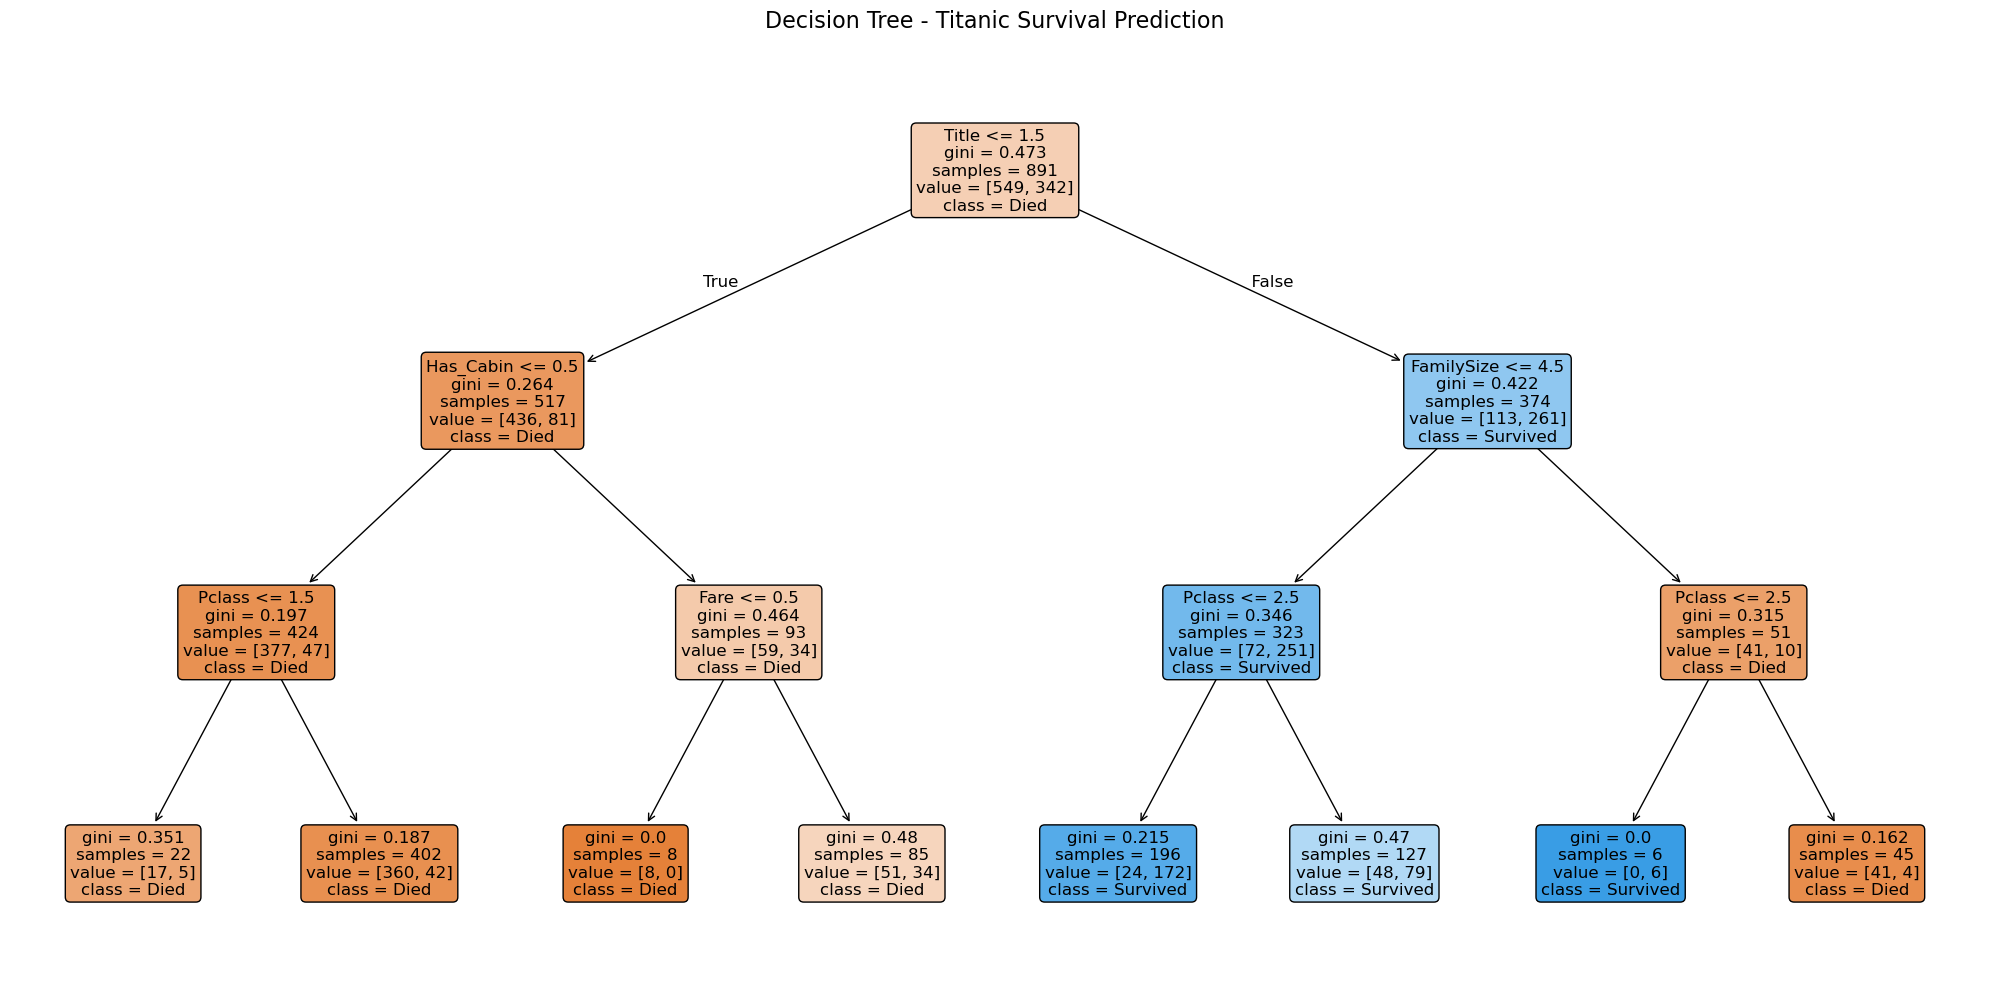


TEXT REPRESENTATION OF DECISION TREE
|--- Title <= 1.50
|   |--- Has_Cabin <= 0.50
|   |   |--- Pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- Pclass >  1.50
|   |   |   |--- class: 0
|   |--- Has_Cabin >  0.50
|   |   |--- Fare <= 0.50
|   |   |   |--- class: 0
|   |   |--- Fare >  0.50
|   |   |   |--- class: 0
|--- Title >  1.50
|   |--- FamilySize <= 4.50
|   |   |--- Pclass <= 2.50
|   |   |   |--- class: 1
|   |   |--- Pclass >  2.50
|   |   |   |--- class: 1
|   |--- FamilySize >  4.50
|   |   |--- Pclass <= 2.50
|   |   |   |--- class: 1
|   |   |--- Pclass >  2.50
|   |   |   |--- class: 0


FEATURE IMPORTANCE
      feature  importance
9       Title    0.674101
7  FamilySize    0.157694
0      Pclass    0.103304
6   Has_Cabin    0.052493
4        Fare    0.012408
1         Sex    0.000000
2         Age    0.000000
3       Parch    0.000000
5    Embarked    0.000000
8     IsAlone    0.000000


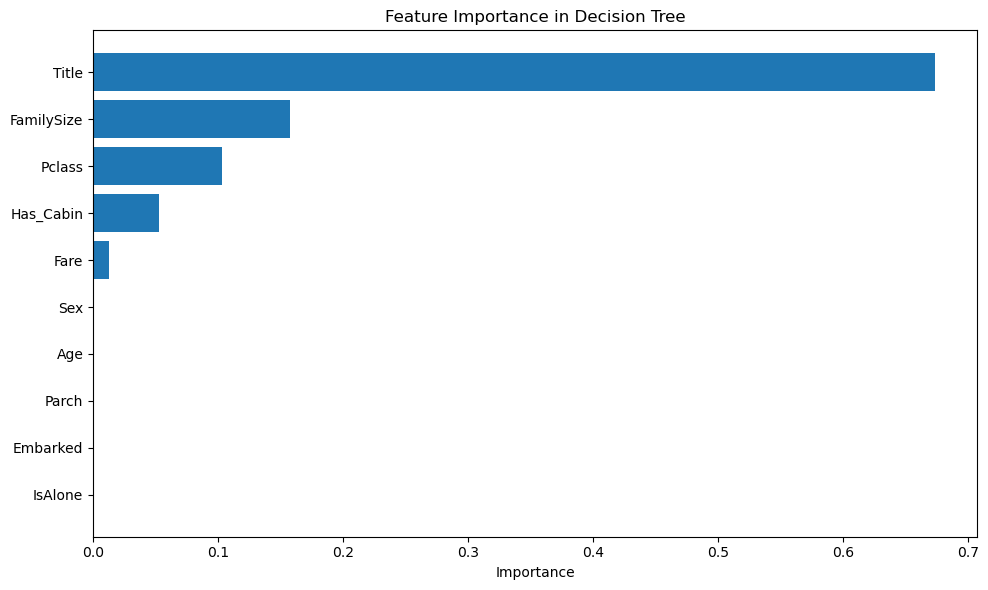


🎯 Interpretation note:
• "Title <= 1.5" corresponds to "Mr." title (Title mapping: Mr=1, Master=2, Mrs=3, Miss=4, Rare=5)
• First split is on Title feature, confirming our earlier analysis


In [66]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = train['Survived']
x_train = train.drop(['Survived'], axis=1).values 
x_test = test.values

# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(x_train, y_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
submission = pd.DataFrame({
    "PassengerId": PassengerId,
    "Survived": y_pred
})
submission.to_csv('submission.csv', index=False)

print("✅ Model trained and predictions saved to submission.csv")

# Visualize Decision Tree using matplotlib
plt.figure(figsize=(20, 10))
plot_tree(decision_tree,
          feature_names=list(train.drop(['Survived'], axis=1).columns),
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=12,
          max_depth=3)  # Giới hạn độ sâu hiển thị

plt.title("Decision Tree - Titanic Survival Prediction", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Hiển thị thêm text representation để dễ đọc
print("\n" + "="*60)
print("TEXT REPRESENTATION OF DECISION TREE")
print("="*60)

from sklearn.tree import export_text
tree_rules = export_text(decision_tree, 
                       feature_names=list(train.drop(['Survived'], axis=1).columns))
print(tree_rules)

# Hiển thị feature importance
print("\n" + "="*60)
print("FEATURE IMPORTANCE")
print("="*60)

feature_importance = pd.DataFrame({
    'feature': train.drop(['Survived'], axis=1).columns,
    'importance': decision_tree.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Decision Tree')
plt.gca().invert_yaxis()  # Hiển thị feature quan trọng nhất ở trên cùng
plt.tight_layout()
plt.show()

print("\n🎯 Interpretation note:")
print('• "Title <= 1.5" corresponds to "Mr." title (Title mapping: Mr=1, Master=2, Mrs=3, Miss=4, Rare=5)')
print('• First split is on Title feature, confirming our earlier analysis')

In [67]:
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

82.38

Cuối cùng, chúng ta đã có Cây Quyết Định của mình! Nó đạt độ chính xác 82.38% trên tập dữ liệu huấn luyện. Hãy bắt đầu giải thích cách đọc biểu đồ.

Dòng đầu tiên của mỗi nút (ngoại trừ những nút ở hàng cuối cùng) hiển thị điều kiện phân tách dưới dạng "đặc trưng <= giá trị".

Tiếp theo, chúng ta tìm thấy Độ không thuần nhất Gini của nút, đã được giải thích trong kernel này. "Samples" đơn giản là số lượng quan sát chứa trong nút.

"Value" hiển thị phân phối lớp của các mẫu ([số lượng không sống sót, số lượng sống sót]).

Cuối cùng, "class" tương ứng với lớp chiếm ưu thế của mỗi nút, và đây là cách mô hình của chúng ta sẽ phân loại một quan sát. Màu sắc cũng đại diện cho lớp, với độ đậm tăng lên theo phân phối thực tế của các mẫu.

Mô hình của chúng ta do đó có thể được tóm tắt bằng 4 quy tắc đơn giản:

- Nếu quan sát của chúng ta bao gồm Title "Mr", thì chúng ta phân loại nó là không sống sót (tất cả các nhánh ở phía bên trái của cây dẫn đến một nút màu cam)

- Nếu nó không bao gồm Title "Mr", và FamilySize nhỏ hơn hoặc bằng 4, thì chúng ta phân loại nó là sống sót.

- Nếu nó không bao gồm Title "Mr", FamilySize lớn hơn 4 và Pclass nhỏ hơn hoặc bằng 2, thì chúng ta phân loại nó là sống sót.

- Nếu nó không bao gồm Title "Mr", FamilySize lớn hơn 4 và Pclass lớn hơn 2, thì chúng ta phân loại nó là không sống sót.

Nhờ những quy tắc này, chúng ta có thể suy ra một số hiểu biết sâu sắc về vụ đắm tàu. Những "Quý ông" dường như đã làm rạng danh danh xưng của mình và hy sinh bản thân vì phụ nữ và những người đàn ông có danh xưng kỳ lạ hơn như "Thuyền trưởng" hoặc "Bác sĩ". Chúng ta cũng có thể lưu ý rằng những gia đình nhỏ hơn có cơ hội sống sót cao hơn, có lẽ vì những gia đình lớn hơn đã cố gắng ở lại cùng nhau hoặc tìm kiếm các thành viên bị mất tích và do đó không còn chỗ trên các thuyền cứu sinh. Cuối cùng, chúng ta có thể quan sát thấy rằng hành khách hạng 3 cũng có ít cơ hội sống sót hơn, vì vậy có lẽ những hành khách thuộc các tầng lớp xã hội cao hơn đã được ưu tiên, hoặc đơn giản là các khoang hạng 3 có thể ở xa thuyền cứu sinh hơn.